# STEP 1: Import The Following Relevant Scientific and Computational Libraries for Data Manipulation, Modelling, Interpretation, Visualization ETC.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Lambda, Input, Dense, Embedding, multiply, Flatten, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# STEP 2: DATA EXPLORATORY

# Preamble

Prior to synthetic data generation, data preprocessing steps were meticulously applied to each dataset, ensuring data cleanliness, normalization, and partitioning into the said two main component data. The original dataset, comprising 80% of the total data, served as the foundation for generating synthetic data. In contrast, the remaining 20%, referred to as control data, was reserved for evaluating both the privacy risks associated with the synthetic dataset and the utility as well.

# Ensuring Privacy Preservation and Data Utility
1. Privacy Preservation: By using an autoencoder to generate synthetic data, we minimize the risk of exposing original data entries. The classifier's role is solely to provide labels for synthetic instances, further abstracting the process from direct data duplication.

2. Data Utility: The utility of the synthetic data is maintained through the autoencoder's ability to capture and replicate the complex relationships in the original data. The trained classifier ensures that synthetic data receives labels that are consistent with the learned patterns, making the synthetic dataset useful for downstream tasks.


# Purpose of the Control Dataset
1. Benchmarking Privacy Leakage: The control dataset (control_data_df) is used to differentiate what an attacker learns purely from the synthetic dataset's utility versus what constitutes an actual privacy leak. By comparing the success of attacks on the control dataset against those on the original dataset, one can more accurately assess the extent of privacy risk.

2. Ensuring Fair Evaluation: It ensures that the assessment accounts for the possibility that the synthetic dataset might inadvertently reveal specific patterns or information that could lead to re-identification or information inference not due to the inherent utility of the synthetic data but due to direct data leakage.

# Creating a Control Dataset
The control dataset should consist of records that are not included in the synthetic dataset's generation process. Here's how to create or obtain a control dataset:

1. Splitting Original Data: Before generating your synthetic dataset, split your original dataset into two parts. One part is used to generate the synthetic dataset (original_data_df), and the other part serves as the control dataset (control_data_df). This way, the control dataset contains real data points that were not used to train the model creating the synthetic data, ensuring they share similar distributions without direct overlaps.



# Anonymeter Tool
Anonymeter’s development as an open-source tool underlines Anonos’s commitment to enhancing privacy technologies’ accessibility. It is crafted to be adaptable, ensuring it remains relevant amid evolving privacy regulations and research advancements. The Anonymeter framework plays a pivotal role in the field of synthetic data by providing a structured approach to evaluate and mitigate privacy risks. By assessing singling-out, linkability, and inference risks, Anonymeter helps researchers and practitioners balance the trade-offs between maintaining data utility and ensuring privacy. This is particularly relevant in the era of big data and machine learning, where the use of synthetic data is becoming increasingly prevalent. For more information on this tool, including its installation and configurations, do visit their website and github via the links below.

https://www.anonos.com/blog/presenting-anonymeter-the-tool-for-assessing-privacy-risks-in-synthetic-datasets

https://github.com/statice/anonymeter

In [2]:
# Load the dataset
lowerBackPain_df = pd.read_csv('C:\\Users\\Ede\\Desktop\\Synthetic_Real_Data_Using_AE_VAE_Techniques\\master_thesis2024\\lower-Back-Pains.csv')

# Display the first few rows of the dataframe
lowerBackPain_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [3]:
# Display the first few rows of the dataframe
lowerBackPain_df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0.674504,19.3825,17.6963,13.72929,1.783007,40.6049,Normal


In [4]:
# Basic information about the dataset
lowerBackPain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Class_att                 310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [5]:
# Descriptive statistics
lowerBackPain_df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [6]:
# Check for missing values
lowerBackPain_df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64

In [7]:
# Assuming 'Class_att' is your target column with binary classes 0 and 1
class_counts = lowerBackPain_df['Class_att'].value_counts()
total_counts = len(lowerBackPain_df)

# Calculate class percentages
class_percentages = (class_counts / total_counts) * 100

# Print class percentages
print("Class Percentages:")
print(class_percentages)

# Check if the data is imbalanced
if abs(class_percentages[0] - class_percentages[1]) > 20:  # You can adjust this threshold
    print("\nThe dataset is imbalanced.")
else:
    print("\nThe dataset is balanced.")

Class Percentages:
Abnormal    67.741935
Normal      32.258065
Name: Class_att, dtype: float64

The dataset is imbalanced.


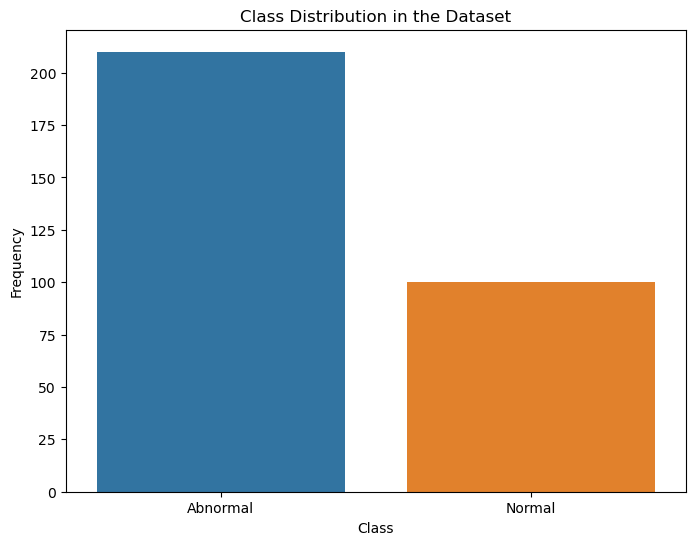

In [8]:
# Assuming 'Class_att' is your target column
class_counts = lowerBackPain_df['Class_att'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in the Dataset')
plt.show()

In [9]:
# Handling Categorical Data
# Since your dataset contains a categorical column (Class_att), you'll need to encode it if you plan to use it in machine learning models.
from sklearn.preprocessing import LabelEncoder

# Encode the 'Class_att' column
label_encoder = LabelEncoder()
lowerBackPain_df['Class_att'] = label_encoder.fit_transform(lowerBackPain_df['Class_att'])

# Verify encoding
lowerBackPain_df['Class_att'].head()

0    0
1    0
2    0
3    0
4    0
Name: Class_att, dtype: int32

# Partioning the Original Data into 80% and 20% respectiively as shown below

In [10]:
lowerBackPain_train_dataframe, control_lbp_dataframe = train_test_split(lowerBackPain_df, test_size=0.2, random_state=42)

In [11]:
lowerBackPain_train_dataframe.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
126,70.676898,21.704402,59.181161,48.972496,103.008354,27.810148,0.039655,15.7748,14.8568,11.45991,-18.475476,19.8407,0
109,68.613001,15.082235,63.014696,53.530766,123.431174,39.497987,0.249351,27.0646,17.7171,7.18220,-20.883262,17.1130,0
247,49.828135,16.736435,28.000000,33.091700,121.435558,1.913307,0.487834,30.4187,15.5507,15.89565,-28.277945,22.0420,1
234,37.731992,9.386298,42.000000,28.345694,135.740926,13.683047,0.465170,28.9703,10.2016,11.24951,-19.160909,34.0011,1
202,76.314028,41.933683,93.284863,34.380345,132.267286,101.218783,0.218939,31.5204,13.6555,12.22936,4.894807,16.5217,0


In [12]:
lowerBackPain_train_dataframe.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
188,85.680950,38.650035,82.680977,47.030914,120.840707,61.959034,0.807919,24.8883,13.2380,10.73285,0.627326,11.2469,0
71,86.900794,32.928168,47.794347,53.972627,135.075364,101.719092,0.459674,25.0986,8.7655,8.93510,-21.318960,12.8518,0
106,65.013773,9.838262,57.735837,55.175511,94.738525,49.696955,0.151994,14.3986,8.9024,10.84295,6.573829,35.1025,0
270,51.311771,8.875541,57.000000,42.436230,126.472258,-2.144044,0.467413,22.7101,10.5134,10.13608,5.738583,36.7874,1
102,70.399308,13.469986,61.200000,56.929322,102.337524,25.538429,0.974401,30.9297,9.5431,12.34978,6.089565,34.9908,0


In [13]:
control_lbp_dataframe.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
289,44.430701,14.174264,32.243495,30.256437,131.717613,-3.604255,0.126792,15.1269,7.9912,12.23055,-26.340144,32.3929,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,0
57,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,0.121465,30.2830,14.6233,8.75046,4.334375,16.8302,0
60,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,0.159378,35.9529,15.3975,11.71169,-18.628293,22.5623,0
25,54.124920,26.650489,35.329747,27.474432,121.447011,1.571205,0.928688,14.6686,13.5700,16.12951,-17.630363,28.1902,0


In [14]:
control_lbp_dataframe.tail() 

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
198,74.854480,13.909084,62.693259,60.945396,115.208701,33.172255,0.821915,20.4667,9.3510,14.37763,4.230442,39.2266,0
195,71.241764,5.268270,85.999584,65.973493,110.703107,38.259864,0.506379,23.0527,15.2430,14.14875,-19.895641,8.6239,0
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0.396364,34.8106,12.7802,15.24996,-28.833891,18.0442,1
224,89.834676,22.639217,90.563461,67.195460,100.501192,3.040973,0.379933,9.4868,17.7556,10.98189,-16.891891,28.0900,1
158,57.035097,0.345728,49.198003,56.689369,103.048698,52.165145,0.561323,35.4921,14.1033,7.99506,-26.223143,40.1564,0


In [15]:
# Assuming 'Class_att' is your target column with binary classes 0 and 1
class_counts = lowerBackPain_train_dataframe['Class_att'].value_counts()
total_counts = len(lowerBackPain_train_dataframe)
print(total_counts) 

248


In [16]:
lowerBackPain_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 126 to 102
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          248 non-null    float64
 1   pelvic_tilt               248 non-null    float64
 2   lumbar_lordosis_angle     248 non-null    float64
 3   sacral_slope              248 non-null    float64
 4   pelvic_radius             248 non-null    float64
 5   degree_spondylolisthesis  248 non-null    float64
 6   pelvic_slope              248 non-null    float64
 7   direct_tilt               248 non-null    float64
 8   thoracic_slope            248 non-null    float64
 9   cervical_tilt             248 non-null    float64
 10  sacrum_angle              248 non-null    float64
 11  scoliosis_slope           248 non-null    float64
 12  Class_att                 248 non-null    int32  
dtypes: float64(12), int32(1)
memory usage: 26.2 KB


# SAVING THE PARTITIONED DATASETS TO CSV FOR FUTURE USE

In [17]:
control_lbp_dataframe.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\control_lbp_dataframe.csv', index=False)

In [18]:
lowerBackPain_train_dataframe.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\lowerBackPain_train_dataframe.csv', index=False)

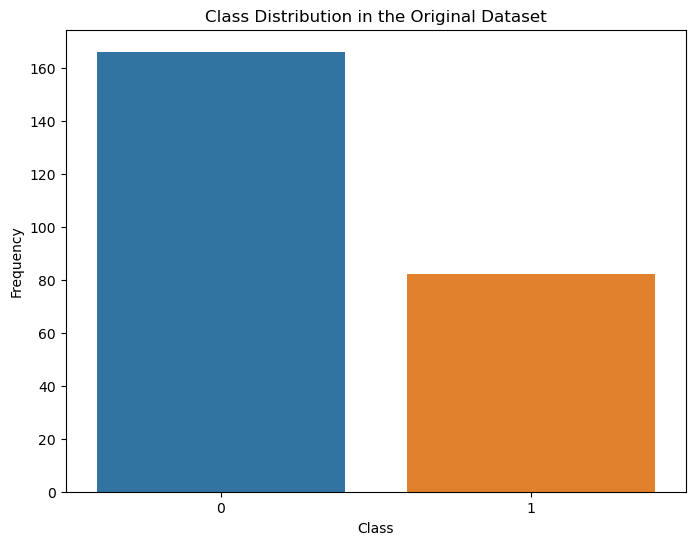

In [19]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = lowerBackPain_train_dataframe['Class_att'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in the Original Dataset')
plt.show()

# STEP 3: DEFINING AND TRAINING AUTO-ENCODER MODEL, AND GENERATE THE RELEVANT SYNTHETIC DATASET THAT MIMICS ORIGINAL DATA

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
import numpy as np
import pandas as pd

# Separate features and target
features = lowerBackPain_train_dataframe.drop('Class_att', axis=1)
labels = lowerBackPain_train_dataframe['Class_att']

# Split the dataset into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(features, labels, test_size=0.2, random_state=42)

# Normalize features 
scaler = MinMaxScaler()
X_train_orig_scaled = scaler.fit_transform(X_train_orig)
X_test_orig_scaled = scaler.transform(X_test_orig)

# Define and compile Autoencoder architecture
input_dim = X_train_orig_scaled.shape[1]

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation="relu")(input_layer)
encoder = Dense(12, activation="relu")(encoder)

# Bottleneck
bottleneck = Dense(6, activation="relu")(encoder)

# Decoder
decoder = Dense(12, activation="relu")(bottleneck)
decoder = Dense(64, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

# Autoencoder
autoencoder_backpain = Model(inputs=input_layer, outputs=decoder)
autoencoder_backpain.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
autoencoder_backpain.fit(X_train_orig_scaled, X_train_orig_scaled, epochs=1000, batch_size=12, validation_split=0.2, verbose=2)

# Generate synthetic features from the entire original dataset scaled
synthetic_features_scaled = autoencoder_backpain.predict(scaler.transform(features))

# Ensure synthetic data matches the original data's scale
synthetic_features = scaler.inverse_transform(synthetic_features_scaled)

# Train a classifier on the original dataset
classifier = RandomForestClassifier(n_estimators=250, random_state=42)
classifier.fit(X_train_orig, y_train_orig)

# Predict labels for the synthetic features
synthetic_labels_predicted = classifier.predict(synthetic_features)

# Convert synthetic features to a DataFrame
ae_synthetic_backpain_data_df = pd.DataFrame(synthetic_features, columns=features.columns)

# Convert predicted labels into a Series
ae_synthetic_backpain_labels_series = pd.Series(synthetic_labels_predicted, name='Class_att')

# Example usage
print(ae_synthetic_backpain_data_df.head())
print(ae_synthetic_backpain_labels_series.head())



Epoch 1/100

14/14 - 1s - loss: 0.0764 - val_loss: 0.0743 - 1s/epoch - 81ms/step
Epoch 2/100
14/14 - 0s - loss: 0.0739 - val_loss: 0.0726 - 59ms/epoch - 4ms/step
Epoch 3/100
14/14 - 0s - loss: 0.0712 - val_loss: 0.0696 - 58ms/epoch - 4ms/step
Epoch 4/100
14/14 - 0s - loss: 0.0655 - val_loss: 0.0644 - 62ms/epoch - 4ms/step
Epoch 5/100
14/14 - 0s - loss: 0.0587 - val_loss: 0.0613 - 55ms/epoch - 4ms/step
Epoch 6/100
14/14 - 0s - loss: 0.0552 - val_loss: 0.0589 - 54ms/epoch - 4ms/step
Epoch 7/100
14/14 - 0s - loss: 0.0537 - val_loss: 0.0586 - 69ms/epoch - 5ms/step
Epoch 8/100
14/14 - 0s - loss: 0.0531 - val_loss: 0.0577 - 56ms/epoch - 4ms/step
Epoch 9/100
14/14 - 0s - loss: 0.0526 - val_loss: 0.0575 - 66ms/epoch - 5ms/step
Epoch 10/100
14/14 - 0s - loss: 0.0521 - val_loss: 0.0564 - 68ms/epoch - 5ms/step
Epoch 11/100
14/14 - 0s - loss: 0.0514 - val_loss: 0.0562 - 68ms/epoch - 5ms/step
Epoch 12/100
14/14 - 0s - loss: 0.0508 - val_loss: 0.0550 - 69ms/epoch - 5ms/step
Epoch 13/100
14/14 - 0s 

Epoch 96/100
14/14 - 0s - loss: 0.0216 - val_loss: 0.0293 - 59ms/epoch - 4ms/step
Epoch 97/100
14/14 - 0s - loss: 0.0214 - val_loss: 0.0285 - 55ms/epoch - 4ms/step
Epoch 98/100
14/14 - 0s - loss: 0.0215 - val_loss: 0.0289 - 54ms/epoch - 4ms/step
Epoch 99/100
14/14 - 0s - loss: 0.0212 - val_loss: 0.0292 - 57ms/epoch - 4ms/step
Epoch 100/100
14/14 - 0s - loss: 0.0212 - val_loss: 0.0290 - 59ms/epoch - 4ms/step
8/8 [==============================] - 0s 2ms/step
   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         81.357117    27.086718              66.653366     51.890564   
1         75.432030    23.414028              67.023026     53.200356   
2         51.317909    13.714837              38.539108     36.228241   
3         43.354073    10.684060              37.107811     36.075588   
4         84.182007    32.909496              66.765694     45.994312   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  direct_tilt  \
0     111.930298          

C:\Users\Ede\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# SAVE THE ABOVE CREATED GENERATIVE AUTOENCODER MODEL

In [21]:
from tensorflow.keras.models import load_model

# Assume 'autoencoder' is your trained model
autoencoder_backpain.save('autoencoder_backpain.keras')  # Saves the model to an HDF5 file


In [22]:
from tensorflow.keras.models import load_model

# Assume 'autoencoder' is your trained model
autoencoder_backpain.save('autoencoder_backpain.h5')  # Saves the model to an HDF5 file


C:\Users\Ede\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Join the Generated Synthetic Data and labels

In [23]:
import pandas as pd

# Join the labels with the synthetic data

ae_synthetic_backpain_data_with_labels_df = ae_synthetic_backpain_data_df.assign(Class_att=ae_synthetic_backpain_labels_series.values)

In [24]:
ae_synthetic_backpain_data_with_labels_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,81.357117,27.086718,66.653366,51.890564,111.930298,47.621098,0.284097,20.656658,12.282526,12.368567,-15.384958,23.851908,0
1,75.432030,23.414028,67.023026,53.200356,115.279968,40.115093,0.605978,22.223530,14.940562,11.620285,-27.146317,22.179380,0
2,51.317909,13.714837,38.539108,36.228241,122.132729,4.728514,0.512607,33.577301,16.148863,15.275826,-26.008961,19.482080,1
3,43.354073,10.684060,37.107811,36.075588,121.889923,0.953714,0.581245,23.818733,12.221359,13.207416,-14.443474,23.579494,1
4,84.182007,32.909496,66.765694,45.994312,112.566078,60.043358,0.102018,23.863476,12.596196,13.563471,-8.150921,25.512913,0


# SAVING THE GENERATED AE SYNTHETIC DATASET TO CSV

In [25]:
# Save the generated synthetic data to a CSV file

ae_synthetic_backpain_data_with_labels_df.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\ae_synthetic_backpain_data_with_labels_df.csv', index=False)

In [27]:
ae_synthetic_backpain_labels_series.head()

0    0
1    0
2    1
3    1
4    0
Name: Class_att, dtype: int32

In [30]:
featuresLBP_ORIG = lowerBackPain_train_dataframe.drop('Class_att', axis=1)
labelsLBP_ORIG = lowerBackPain_train_dataframe['Class_att']

# Split the dataset into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresLBP_ORIG, labelsLBP_ORIG, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_orig shape:", X_train_orig.shape)
print("X_test_orig shape:", X_test_orig.shape)
print("y_train_orig shape:", y_train_orig.shape)
print("y_test_orig shape:", y_test_orig.shape)

X_train_orig shape: (198, 12)
X_test_orig shape: (50, 12)
y_train_orig shape: (198,)
y_test_orig shape: (50,)


In [29]:
featuresCONT = control_lbp_dataframe.drop('Class_att', axis=1)
labelsCONT = control_lbp_dataframe['Class_att']

# Split the dataset into training and testing sets
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_cont shape:", X_train_cont.shape)
print("X_test_cont shape:", X_test_cont.shape)
print("y_train_cont shape:", y_train_cont.shape)
print("y_test_cont shape:", y_test_cont.shape)

X_train_cont shape: (49, 12)
X_test_cont shape: (13, 12)
y_train_cont shape: (49,)
y_test_cont shape: (13,)


In [28]:
featuresLBP_AE = ae_synthetic_backpain_data_with_labels_df.drop('Class_att', axis=1)
labelsLBP_AE = ae_synthetic_backpain_data_with_labels_df['Class_att']

# Split the dataset into training and testing sets
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresLBP_AE, labelsLBP_AE, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_syn_ae shape:", X_train_syn_ae.shape)
print("X_test_syn_ae shape:", X_test_syn_ae.shape)
print("y_train_syn_ae shape:", y_train_syn_ae.shape)
print("y_test_syn_ae shape:", y_test_syn_ae.shape)

X_train_syn_ae shape: (198, 12)
X_test_syn_ae shape: (50, 12)
y_train_syn_ae shape: (198,)
y_test_syn_ae shape: (50,)


In [24]:
# Split the dataset into training and testing sets
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(ae_synthetic_backpain_data_df, ae_synthetic_backpain_labels_series, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_syn shape:", X_train_syn.shape)
print("X_test_syn shape:", X_test_syn.shape)
print("y_train_syn shape:", y_train_syn.shape)
print("y_test_syn shape:", y_test_syn.shape)

X_train_syn shape: (198, 12)
X_test_syn shape: (50, 12)
y_train_syn shape: (198,)
y_test_syn shape: (50,)


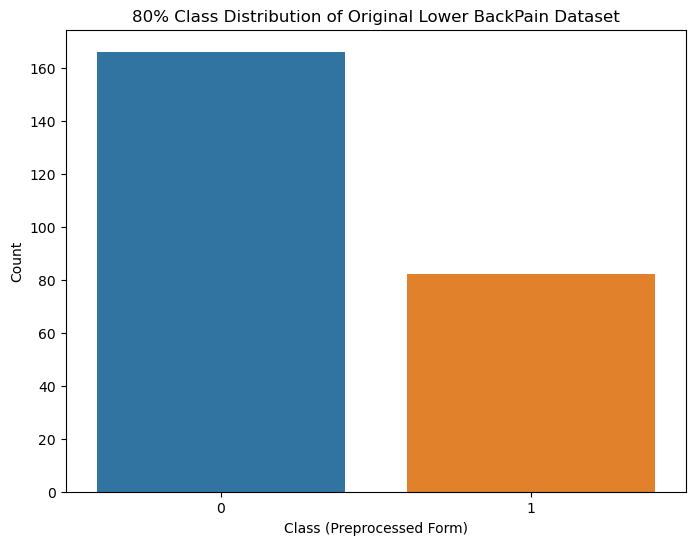

In [63]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = lowerBackPain_train_dataframe['Class_att'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class (Preprocessed Form)')
plt.ylabel('Count')
plt.title('80% Class Distribution of Original Lower BackPain Dataset')
plt.show()

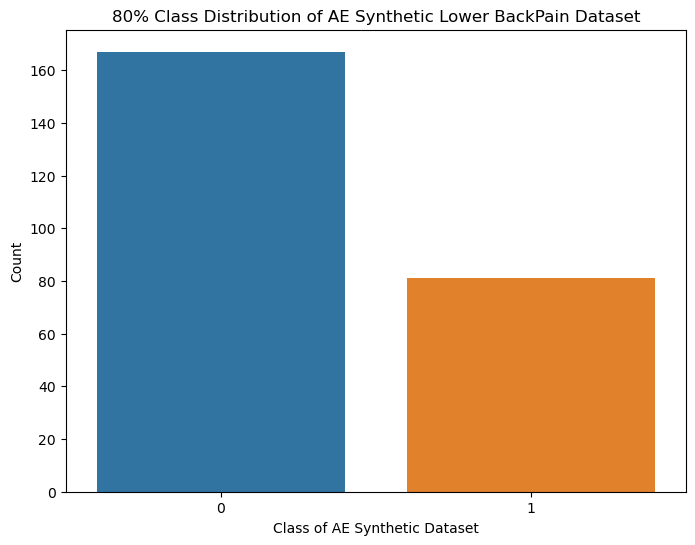

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# If ae_synthetic_labels_df is a DataFrame with a column named 'PredictedLabels'
plt.figure(figsize=(8, 6))
sns.countplot(x=ae_synthetic_labels_series, data=ae_synthetic_data_df)
plt.title('80% Class Distribution of AE Synthetic Lower BackPain Dataset')
plt.xlabel('Class of AE Synthetic Dataset')
plt.ylabel('Count')
plt.show()

# Computational and Graphical Representations of AUC-ROC Curves by Classifiers

C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Number of positive: 61, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 198, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.308081 -> initscore=-0.809107
[LightGBM] [Info] Start training from score -0.809107
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


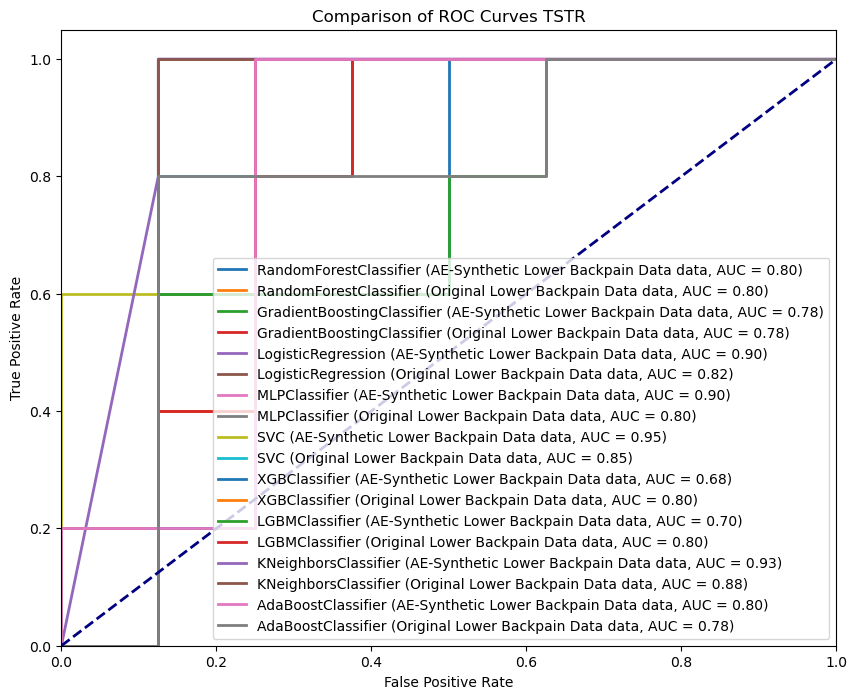

In [31]:
# 1. Import Necessary Libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 2. Define Data Splits for Original and Control Datasets
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresLBP_AE, labelsLBP_AE, test_size=0.2, random_state=42)

# 3. Scale the Data
scaler = StandardScaler()
X_train_syn_ae_scaled = scaler.fit_transform(X_train_syn_ae)
X_test_syn_ae_scaled = scaler.transform(X_test_syn_ae)
# X_train_cont_scaled = scaler.transform(X_train_cont)
X_test_cont_scaled = scaler.transform(X_test_cont)

# Assuming featuresAE and labelsAE are your synthetic dataset and its corresponding labels
X_original_scaled = scaler.transform(featuresLBP_ORIG)

# 4. Split and Scale the Synthetic Dataset
X_train_orig_scaled, X_test_orig_scaled, y_train_orig, y_test_orig = train_test_split(X_original_scaled, labelsLBP_ORIG, test_size=0.2, random_state=42)

# 5. Define the `plot_auc_roc` Function
def plot_auc_roc(model, X_train, y_train, X_test, y_test, data_type):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"{model.__class__.__name__} does not have predict_proba or decision_function.")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} ({data_type} data, AUC = {roc_auc:.2f})')

    # 6. Define Models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(),
    "SVC": SVC(probability=True),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}
# 7. Plot AUC-ROC Curves for Models Trained on Synthetic and Real Data
plt.figure(figsize=(10, 8))
for name, model in models.items():
    plot_auc_roc(model, X_train_syn_ae_scaled, y_train_syn_ae, X_test_cont_scaled, y_test_cont, "AE-Synthetic Lower Backpain Data") #TSTR
    plot_auc_roc(model, X_train_orig_scaled, y_train_orig, X_test_cont_scaled, y_test_cont, "Original Lower Backpain Data") #TRTR
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves TSTR')
plt.legend(loc="lower right")
plt.show()


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Number of positive: 61, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 198, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.308081 -> initscore=-0.809107
[LightGBM] [Info] Start training from score -0.809107
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


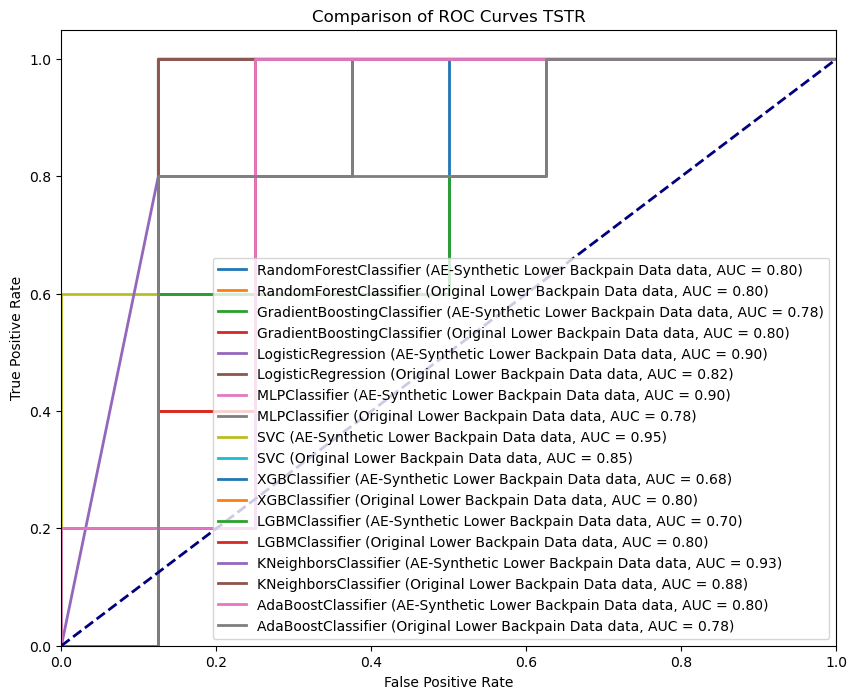

In [34]:
# 1. Import Necessary Libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 2. Define Data Splits for Original and Control Datasets
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(featuresLBP_AE, labelsLBP_AE, test_size=0.2, random_state=42)

# 3. Scale the Data
scaler = StandardScaler()
X_train_syn_ae_scaled = scaler.fit_transform(X_train_syn_ae)
X_test_syn_ae_scaled = scaler.transform(X_test_syn_ae)
# X_train_cont_scaled = scaler.transform(X_train_cont)
X_test_cont_scaled = scaler.transform(X_test_cont)

# Assuming featuresAE and labelsAE are your synthetic dataset and its corresponding labels
X_original_scaled = scaler.transform(featuresLBP_ORIG)

# 4. Split and Scale the Synthetic Dataset
X_train_orig_scaled, X_test_orig_scaled, y_train_orig, y_test_orig = train_test_split(X_original_scaled, labelsLBP_ORIG, test_size=0.2, random_state=42)

# 5. Define the `plot_auc_roc` Function
def plot_auc_roc(model, X_train, y_train, X_test, y_test, data_type):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"{model.__class__.__name__} does not have predict_proba or decision_function.")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} ({data_type} data, AUC = {roc_auc:.2f})')

    # 6. Define Models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(),
    "SVC": SVC(probability=True),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}
# 7. Plot AUC-ROC Curves for Models Trained on Synthetic and Real Data
plt.figure(figsize=(10, 8))
for name, model in models.items():
    plot_auc_roc(model, X_train_syn_ae_scaled, y_train_syn_ae, X_test_cont_scaled, y_test_cont, "AE-Synthetic Lower Backpain Data") #TSTR
    plot_auc_roc(model, X_train_orig_scaled, y_train_orig, X_test_cont_scaled, y_test_cont, "Original Lower Backpain Data") #TRTR
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves TSTR')
plt.legend(loc="lower right")
plt.show()


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 62, number of negative: 136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 810
[LightGBM] [Info] Number of data points in the train set: 198, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313131 -> initscore=-0.785521
[LightGBM] [Info] Start training from score -0.785521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

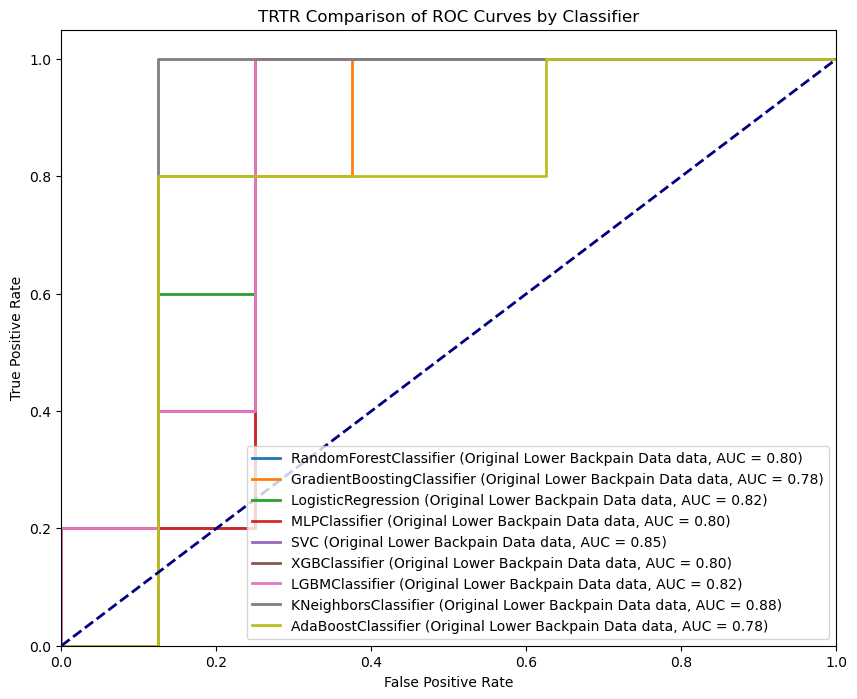

In [33]:
# 1. Import Necessary Libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 2. Define Data Splits for Original Dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresLBP_ORIG, labelsLBP_ORIG, test_size=0.2, random_state=42)
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)



# 3. Scale the Data
scaler = StandardScaler()
X_train_orig_scaled = scaler.fit_transform(X_train_orig)
X_test_cont_scaled = scaler.transform(X_test_cont)

# 5. Define the `plot_auc_roc` Function
def plot_auc_roc(model, X_train, y_train, X_test, y_test, data_type):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"{model.__class__.__name__} does not have predict_proba or decision_function.")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} ({data_type} data, AUC = {roc_auc:.2f})')

# 6. Define Models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(),
    "SVC": SVC(probability=True),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

# 7. Plot AUC-ROC Curves for Models Trained on Original Data
plt.figure(figsize=(10, 8))
for name, model in models.items():
    plot_auc_roc(model, X_train_orig_scaled, y_train_orig, X_test_cont_scaled, y_test_cont, "Original Lower Backpain Data") #TRTR

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TRTR Comparison of ROC Curves by Classifier')
plt.legend(loc="lower right")
plt.show()


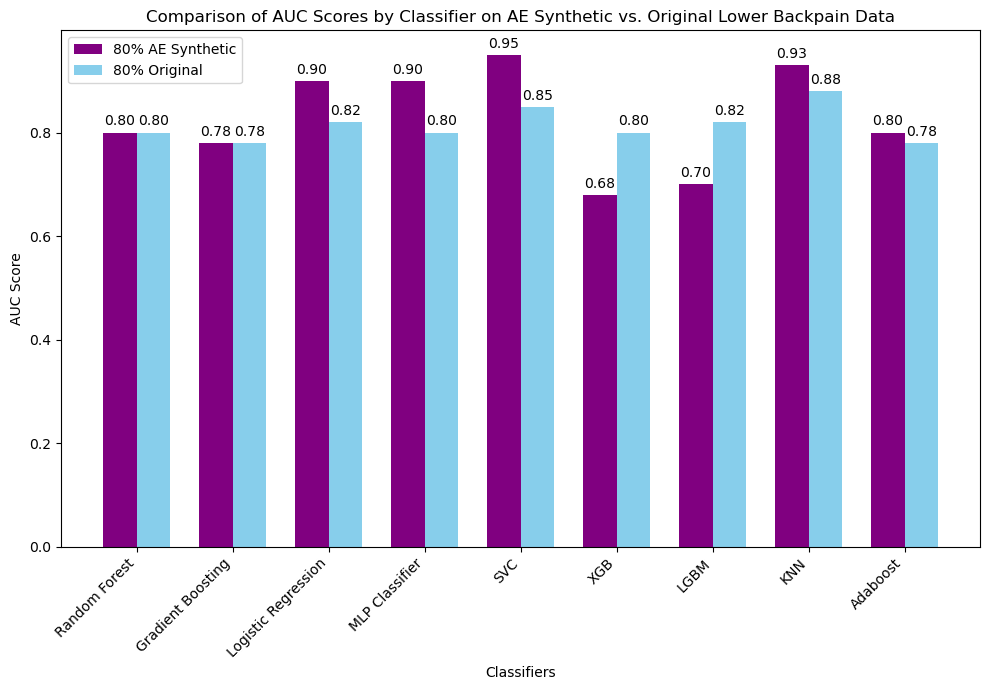

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = [
    "Random Forest", "Gradient Boosting", "Logistic Regression", 
    "MLP Classifier", "SVC", "XGB", "LGBM", "KNN", "Adaboost"
]

# AUC scores for synthetic data
synthetic_auc = [0.80, 0.78, 0.90, 0.90, 0.95, 0.68, 0.70, 0.93, 0.80]

# AUC scores for original data
original_auc = [0.80, 0.78, 0.82, 0.80, 0.85, 0.80, 0.82, 0.88, 0.78]

x = np.arange(len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x - width/2, synthetic_auc, width, label='80% AE Synthetic', color='purple')# navy
rects2 = ax.bar(x + width/2, original_auc, width, label='80% Original', color='skyblue')# skyblue

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classifiers')
ax.set_ylabel('AUC Score')
ax.set_title('Comparison of AUC Scores by Classifier on AE Synthetic vs. Original Lower Backpain Data')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45, ha='right')
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

plt.tight_layout()
plt.show()


# CLASSIFICATION REPORTS FOR 80% AE SYNTHETIC AND ORIGINAL LOWER BACKPAIN DATASET

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = GradientBoostingClassifier(random_state=42)
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # this is the 20% unseen data TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("GB on 80% Original BackPain/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = GradientBoostingClassifier(random_state=42)
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # this is the 20% unseen data TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("GB on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):\n", report)


GB on 80% Original BackPain/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.20      0.33         5

    accuracy                           0.69        13
   macro avg       0.83      0.60      0.57        13
weighted avg       0.79      0.69      0.62        13

GB on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.60      0.60      0.60         5

    accuracy                           0.69        13
   macro avg       0.68      0.68      0.68        13
weighted avg       0.69      0.69      0.69        13



In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = RandomForestClassifier(random_state=42)
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("RF on 80% Original BackPain/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = RandomForestClassifier(random_state=42)
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("RF on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):\n", report)


RF on 80% Original BackPain/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.50      0.20      0.29         5

    accuracy                           0.62        13
   macro avg       0.57      0.54      0.51        13
weighted avg       0.58      0.62      0.56        13

RF on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13



In [62]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = XGBClassifier()
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("XGB on 80% Original BackPain/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = XGBClassifier()
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("XGB on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):\n", report)


XGB on 80% Original BackPain/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.50      0.40      0.44         5

    accuracy                           0.62        13
   macro avg       0.58      0.57      0.58        13
weighted avg       0.60      0.62      0.61        13

XGB on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.60      0.60      0.60         5

    accuracy                           0.69        13
   macro avg       0.68      0.68      0.68        13
weighted avg       0.69      0.69      0.69        13



In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = MLPClassifier()
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("MLP on 80% Original BackPain/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = MLPClassifier()
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("MLP on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):\n", report)


MLP on 80% Original BackPain/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.75      0.60      0.67         5

    accuracy                           0.77        13
   macro avg       0.76      0.74      0.75        13
weighted avg       0.77      0.77      0.76        13

MLP on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.71      1.00      0.83         5

    accuracy                           0.85        13
   macro avg       0.86      0.88      0.85        13
weighted avg       0.89      0.85      0.85        13



C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = DecisionTreeClassifier()
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("DCT on 80% Original BackPain/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = DecisionTreeClassifier()
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("DCT on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):\n", report)


DCT on 80% Original BackPain/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.20      0.33         5

    accuracy                           0.69        13
   macro avg       0.83      0.60      0.57        13
weighted avg       0.79      0.69      0.62        13

DCT on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.71      1.00      0.83         5

    accuracy                           0.85        13
   macro avg       0.86      0.88      0.85        13
weighted avg       0.89      0.85      0.85        13



In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = LogisticRegression(C=1.0, solver='lbfgs', random_state=42, max_iter=1500)
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("LGR on 80% Original BackPain/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = LogisticRegression(C=1.0, solver='lbfgs', random_state=42, max_iter=1500)
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("LGR on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):\n", report)


LGR on 80% Original BackPain/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.60      0.60      0.60         5

    accuracy                           0.69        13
   macro avg       0.68      0.68      0.68        13
weighted avg       0.69      0.69      0.69        13

LGR on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13



In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = KNeighborsClassifier()
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # this is the 20% unseen data TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("KNN on 80% Original BackPain/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = KNeighborsClassifier()
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # this is the 20% unseen data TSTR 

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("KNN on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):\n", report)


KNN on 80% Original BackPain/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13

KNN on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.62      1.00      0.77         5

    accuracy                           0.77        13
   macro avg       0.81      0.81      0.77        13
weighted avg       0.86      0.77      0.77        13



In [71]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = LGBMClassifier()
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("LGBM on 80% Original BackPain/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = LGBMClassifier()
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("LGBM on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):\n", report)


[LightGBM] [Info] Number of positive: 62, number of negative: 136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 198, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313131 -> initscore=-0.785521
[LightGBM] [Info] Start training from score -0.785521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = SVC(probability=True)
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("SVC on 80% Original BackPain/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = SVC(probability=True)
classifier_syn.fit(X_train_syn_ae, y_train_syn_ae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("SVC on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):\n", report)


SVC on 80% Original BackPain/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.50      0.40      0.44         5

    accuracy                           0.62        13
   macro avg       0.58      0.57      0.58        13
weighted avg       0.60      0.62      0.61        13

SVC on 80% AE Synthetic BackPain/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.62      1.00      0.77         5

    accuracy                           0.77        13
   macro avg       0.81      0.81      0.77        13
weighted avg       0.86      0.77      0.77        13



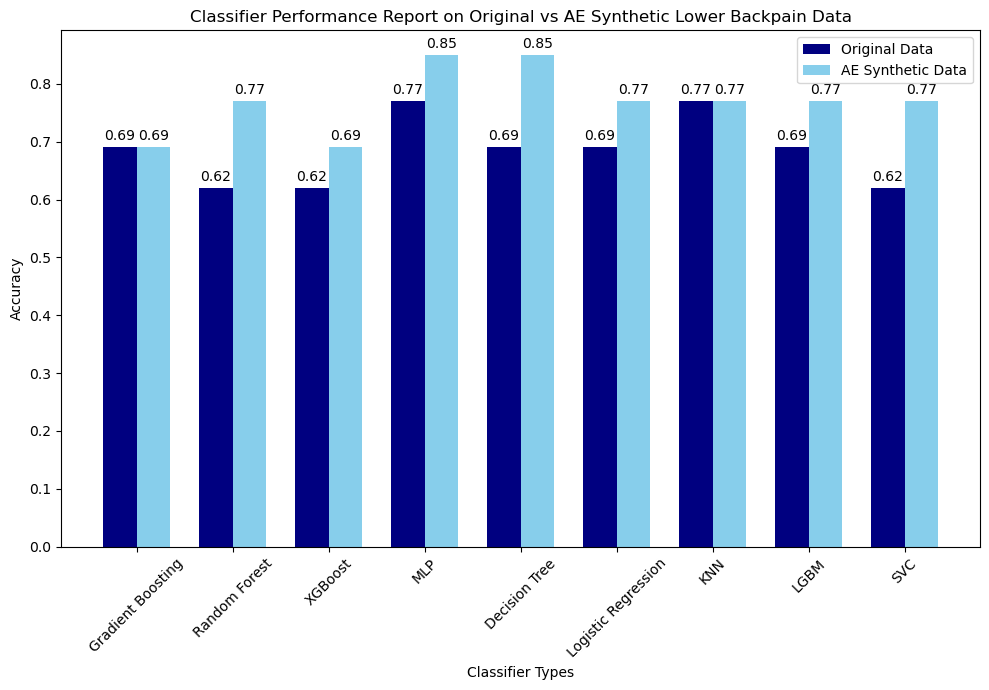

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names and their performance metrics
classifiers = ['Gradient Boosting', 'Random Forest', 'XGBoost', 'MLP', 'Decision Tree', 'Logistic Regression', 'KNN', 'LGBM', 'SVC']
original_accuracy = [0.69, 0.62, 0.62, 0.77, 0.69, 0.69, 0.77, 0.69, 0.62]
synthetic_accuracy = [0.69, 0.77, 0.69, 0.85, 0.85, 0.77, 0.77, 0.77, 0.77]

x = np.arange(len(classifiers))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x - width/2, original_accuracy, width, label='Original Data', color='navy')
rects2 = ax.bar(x + width/2, synthetic_accuracy, width, label='AE Synthetic Data', color='skyblue')

# Adding labels, title and custom x-axis tick labels
ax.set_xlabel('Classifier Types')
ax.set_ylabel('Accuracy')
ax.set_title('Classifier Performance Report on Original vs AE Synthetic Lower Backpain Data')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45)
ax.legend()

# Adding text labels
def autolabel(rects):
    """Attach a text label above each bar, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


# COMPUTING CROSS-VALIDATION OF 80% ORIGINAL AND AE-SYNTHETIC LOWER BACKPAIN

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Encoding categorical labels if necessary
le = LabelEncoder()
ae_synthetic_labels_ae_encoded = le.fit_transform(ae_synthetic_labels_series)

# Splitting the dataset
X_train_syn_ae, X_test_syn_ae, y_train_syn_ae, y_test_syn_ae = train_test_split(ae_synthetic_data_df, ae_synthetic_labels_ae_encoded, test_size=0.2, random_state=42)

# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier
for clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_syn_ae, y_train_syn_ae, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy of 80% AE-Synthetic Lower Backpain = {mean_cv_score:.4f}, Std = {std_cv_score:.4f}")


DecisionTreeClassifier: Mean CV Accuracy of 80% AE-Synthetic Lower Backpain = 0.9391, Std = 0.0347
GradientBoostingClassifier: Mean CV Accuracy of 80% AE-Synthetic Lower Backpain = 0.9391, Std = 0.0347
RandomForestClassifier: Mean CV Accuracy of 80% AE-Synthetic Lower Backpain = 0.9392, Std = 0.0345


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy of 80% AE-Synthetic Lower Backpain = 0.9290, Std = 0.0521
[LightGBM] [Info] Number of positive: 67, number of negative: 91
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 158, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.424051 -> initscore=-0.306167
[LightGBM] [Info] Start training from score -0.306167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

XGBClassifier: Mean CV Accuracy of 80% AE-Synthetic Lower Backpain = 0.9442, Std = 0.0338
KNeighborsClassifier: Mean CV Accuracy of 80% AE-Synthetic Lower Backpain = 0.9191, Std = 0.0373
LogisticRegression: Mean CV Accuracy of 80% AE-Synthetic Lower Backpain = 0.9291, Std = 0.0404
SVC: Mean CV Accuracy of 80% AE-Synthetic Lower Backpain = 0.9242, Std = 0.0318
MLPClassifier: Mean CV Accuracy of 80% AE-Synthetic Lower Backpain = 0.9544, Std = 0.0250


In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Assuming final_synthetic_df and final_synthetic_labels are your features and labels DataFrames
# Encoding categorical labels if necessary
le = LabelEncoder()
original_labels_ae_encoded = le.fit_transform(labelsBackPain)


# Proceed with your original process by Splitting the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresBackPain, original_labels_ae_encoded, test_size=0.2, random_state=42)


# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier
for clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_orig, y_train_orig, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy of 80% Original Lower Backpain= {mean_cv_score:.4f}, Std = {std_cv_score:.4f}")


DecisionTreeClassifier: Mean CV Accuracy of 80% Original Lower Backpain= 0.7883, Std = 0.0612
GradientBoostingClassifier: Mean CV Accuracy of 80% Original Lower Backpain= 0.8382, Std = 0.0214
RandomForestClassifier: Mean CV Accuracy of 80% Original Lower Backpain= 0.8183, Std = 0.0234


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy of 80% Original Lower Backpain= 0.8437, Std = 0.0322
[LightGBM] [Info] Number of positive: 49, number of negative: 109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 158, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.310127 -> initscore=-0.799528
[LightGBM] [Info] Start training from score -0.799528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

XGBClassifier: Mean CV Accuracy of 80% Original Lower Backpain= 0.8336, Std = 0.0328
KNeighborsClassifier: Mean CV Accuracy of 80% Original Lower Backpain= 0.8229, Std = 0.0247
LogisticRegression: Mean CV Accuracy of 80% Original Lower Backpain= 0.8087, Std = 0.0632
SVC: Mean CV Accuracy of 80% Original Lower Backpain= 0.8235, Std = 0.0439
MLPClassifier: Mean CV Accuracy of 80% Original Lower Backpain= 0.6415, Std = 0.0524


# GRAPHICAL REPRESENTATION OF THE ABOVE MEAN CV OF ORIGINAL AND SYNTHETIC DATASETS

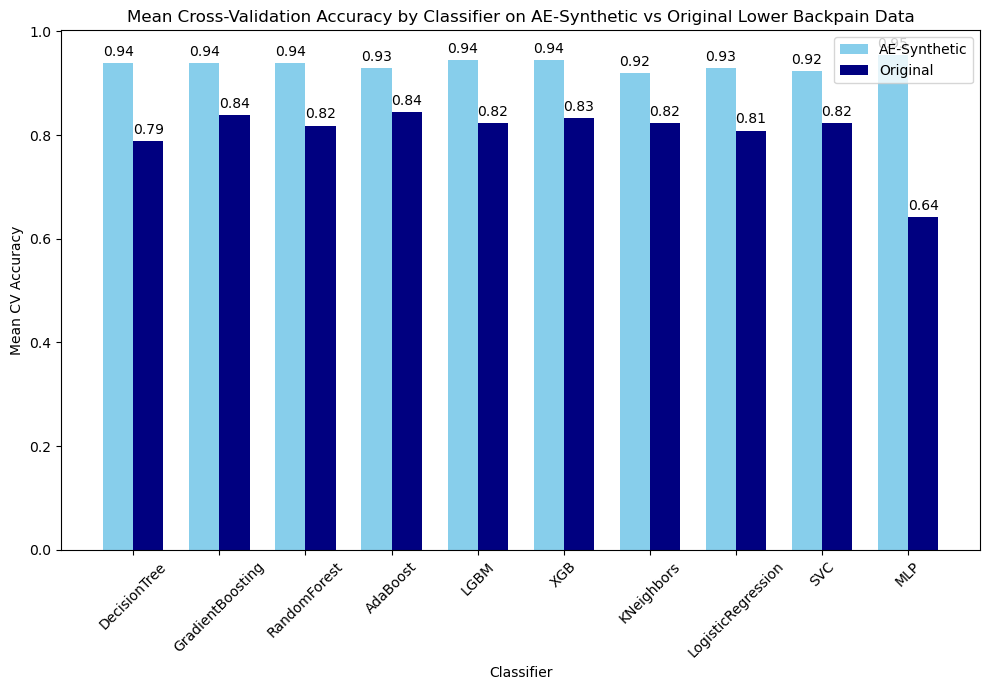

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = ['DecisionTree', 'GradientBoosting', 'RandomForest', 'AdaBoost', 'LGBM', 'XGB', 'KNeighbors', 'LogisticRegression', 'SVC', 'MLP']

# Mean CV accuracies for AE-Synthetic Lower Backpain
synthetic_accuracies = [0.9391, 0.9391, 0.9392, 0.9290, 0.9442, 0.9442, 0.9191, 0.9291, 0.9242, 0.9544]

# Mean CV accuracies for Original Lower Backpain
original_accuracies = [0.7883, 0.8382, 0.8183, 0.8437, 0.8235, 0.8336, 0.8229, 0.8087, 0.8235, 0.6415]

x = np.arange(len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x - width/2, synthetic_accuracies, width, label='AE-Synthetic', color='skyblue')
rects2 = ax.bar(x + width/2, original_accuracies, width, label='Original', color='navy')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Mean CV Accuracy')
ax.set_xlabel('Classifier')
ax.set_title('Mean Cross-Validation Accuracy by Classifier on AE-Synthetic vs Original Lower Backpain Data')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

fig.tight_layout()
plt.show()


# Computing Numerical Statistical Values: KS-Test, P-Value, MSE, RMSE, MAE, F-Test for Variances, T-Test for Means

In [92]:
from scipy.stats import ks_2samp, f_oneway, ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming `obesity_df` and `ae_synthetic_data_df` are properly aligned
for column in ae_synthetic_backpain_data_with_labels_df.columns:
    # KS Test and P-Value
    ks_stat, ks_pvalue = ks_2samp(lowerBackPain_train_dataframe[column], ae_synthetic_backpain_data_with_labels_df[column])
    print(f"KS-Test for {column}: Stat={ks_stat}, P-Value={ks_pvalue}")
    
    # MSE, RMSE, and MAE for a column
    mse = mean_squared_error(lowerBackPain_train_dataframe[column], ae_synthetic_backpain_data_with_labels_df[column])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(lowerBackPain_train_dataframe[column], ae_synthetic_backpain_data_with_labels_df[column])
    print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}")
    
    # F-Test and T-Test for comparing variances and means
    f_stat, f_pvalue = f_oneway(lowerBackPain_train_dataframe[column], ae_synthetic_backpain_data_with_labels_df[column])
    t_stat, t_pvalue = ttest_ind(lowerBackPain_train_dataframe[column], ae_synthetic_backpain_data_with_labels_df[column])
    print(f"F-Test: Stat={f_stat}, P-Value={f_pvalue}")
    print(f"T-Test: Stat={t_stat}, P-Value={t_pvalue}")

    # Means and Standard Deviation
    orig_mean = lowerBackPain_train_dataframe[column].mean()
    ae_syn_mean = ae_synthetic_backpain_data_with_labels_df[column].mean()
    orig_std = lowerBackPain_train_dataframe[column].std()
    ae_syn_std = ae_synthetic_backpain_data_with_labels_df[column].std()
    print(f"Original Mean={orig_mean}, AE_Synthetic Mean={ae_syn_mean}, Original Std={orig_std}, AE_Synthetic Std={ae_syn_std}\n")


KS-Test for pelvic_incidence: Stat=0.08870967741935484, P-Value=0.28368742070689196
MSE: 52.601992631522414, RMSE: 7.252723118355092, MAE: 5.593721232153852
F-Test: Stat=1.7498318320943043, P-Value=0.18650988435444482
T-Test: Stat=1.3228145916881018, P-Value=0.18650905364539383
Original Mean=59.914854344637135, AE_Synthetic Mean=57.99855041503906, Original Std=17.037412780032998, AE_Synthetic Std=15.171503067016602

KS-Test for pelvic_tilt: Stat=0.10887096774193548, P-Value=0.10578064472781237
MSE: 54.81782310052932, RMSE: 7.403905935418772, MAE: 5.772617476277389
F-Test: Stat=0.044368551949953684, P-Value=0.8332562705543335
T-Test: Stat=0.21063700600329893, P-Value=0.8332573881564849
Original Mean=16.881647820282264, AE_Synthetic Mean=16.730283737182617, Original Std=9.518624805401211, AE_Synthetic Std=6.119936466217041

KS-Test for lumbar_lordosis_angle: Stat=0.10483870967741936, P-Value=0.13101795846188205
MSE: 106.81992222417504, RMSE: 10.33537237956016, MAE: 7.713031572886529
F-Te

In [ ]:
featuresBackPain = lowerBackPain_train_dataframe.drop('Class_att', axis=1)
labelsBackPain = lowerBackPain_train_dataframe['Class_att']

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresBackPain, labelsBackPain, test_size=0.2, random_state=42)


# Computing Graphical Statistical Values: KS-Test, P-Value, MSE, RMSE, MAE, F-Test for Variances, T-Test for Means

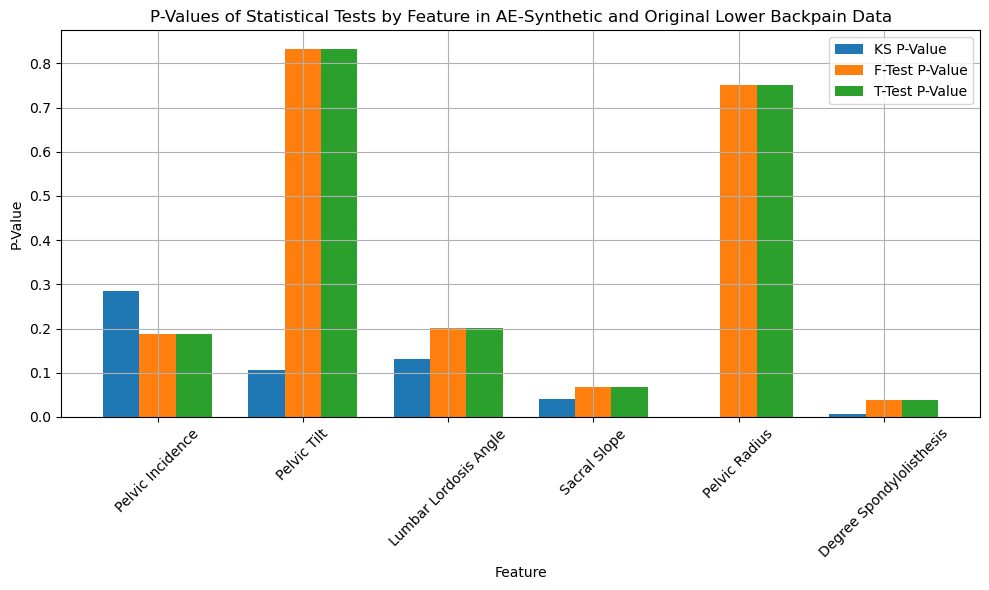

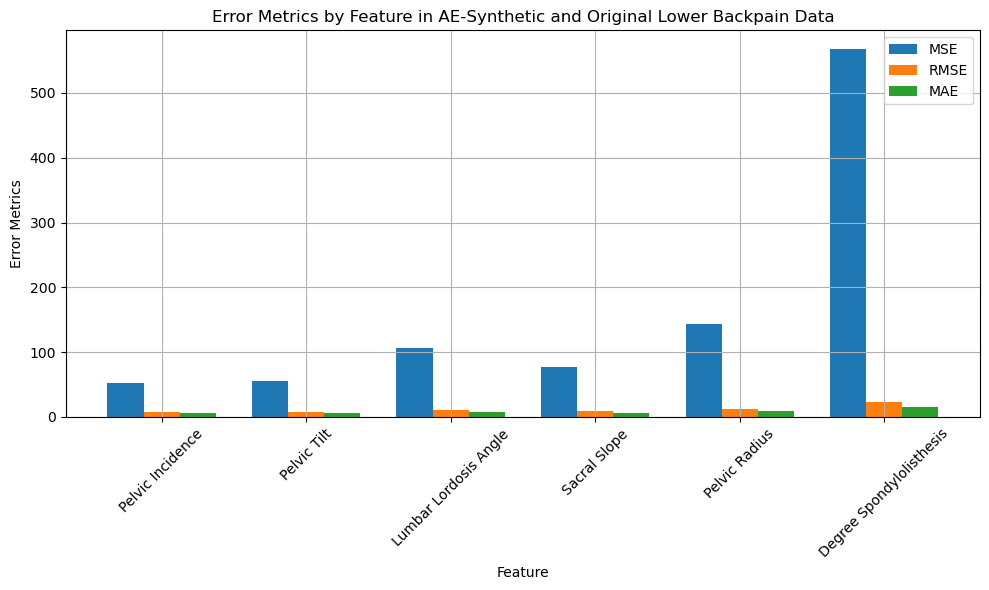

In [95]:
import matplotlib.pyplot as plt
import numpy as np
# Features and their respective values
features = [
    'Pelvic Incidence', 'Pelvic Tilt', 'Lumbar Lordosis Angle', 
    'Sacral Slope', 'Pelvic Radius', 'Degree Spondylolisthesis'
] # KS-Test P-Values
ks_pvalues = [
    0.284, 0.106, 0.131, 
    0.041, 0.000005, 0.006
] # F-Test P-Values
f_pvalues = [
    0.187, 0.833, 0.201, 
    0.067, 0.750, 0.039
] # T-Test P-Values
t_pvalues = [
    0.187, 0.833, 0.201, 
    0.067, 0.750, 0.039
] # Error Metrics
mse_values = [
    52.602, 54.818, 106.820, 
    76.842, 143.503, 568.285
] rmse_values = [
    7.253, 7.404, 10.335, 
    8.766, 11.979, 23.839
] mae_values = [
    5.594, 5.773, 7.713, 
    6.861, 8.992, 15.263
]
x = np.arange(len(features))  # the label locations
width = 0.25  # the width of the bars
# Plot for KS-Test P-Values
plt.figure(figsize=(10, 6))
plt.bar(x - width, ks_pvalues, width, label='KS P-Value')
plt.bar(x, f_pvalues, width, label='F-Test P-Value')
plt.bar(x + width, t_pvalues, width, label='T-Test P-Value')
plt.ylabel('P-Value')
plt.xlabel('Feature')
plt.title('P-Values of Statistical Tests by Feature in AE-Synthetic and Original Lower Backpain Data')
plt.xticks(x, features, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Plot for Error Metrics
plt.figure(figsize=(10, 6))
plt.bar(x - width, mse_values, width, label='MSE')
plt.bar(x, rmse_values, width, label='RMSE')
plt.bar(x + width, mae_values, width, label='MAE')
plt.ylabel('Error Metrics')
plt.xlabel('Feature')
plt.title('Error Metrics by Feature in AE-Synthetic and Original Lower Backpain Data')
plt.xticks(x, features, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


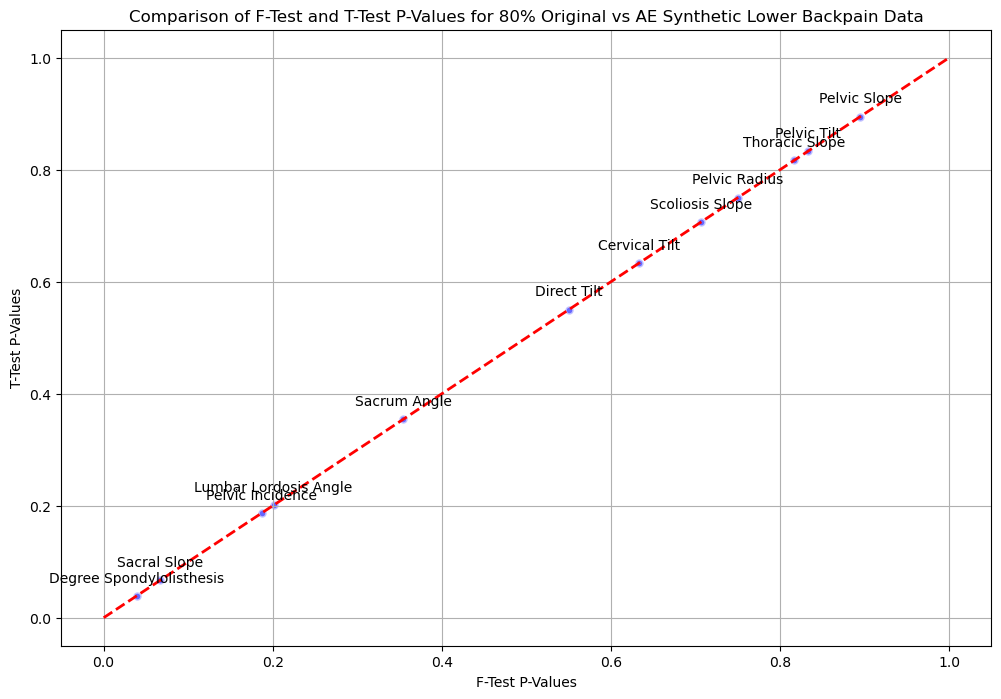

In [108]:
import matplotlib.pyplot as plt

# Data for the plot
features = [
    "Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis Angle",
    "Sacral Slope", "Pelvic Radius", "Degree Spondylolisthesis",
    "Pelvic Slope", "Direct Tilt", "Thoracic Slope",
    "Cervical Tilt", "Sacrum Angle", "Scoliosis Slope"
]

f_test_pvalues = [0.187, 0.833, 0.201, 0.067, 0.750, 0.039, 0.895, 0.550, 0.817, 0.633, 0.354, 0.707]
t_test_pvalues = [0.187, 0.833, 0.201, 0.067, 0.750, 0.039, 0.895, 0.550, 0.817, 0.633, 0.354, 0.707]

# Plotting the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(f_test_pvalues, t_test_pvalues, color='blue', alpha=0.6, edgecolors='w', linewidths=2)

# Annotating the points
for i, txt in enumerate(features):
    plt.annotate(txt, (f_test_pvalues[i], t_test_pvalues[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Adding a line for perfect agreement
plt.plot([0, 1], [0, 1], 'r--', lw=2)

plt.title('Comparison of F-Test and T-Test P-Values for 80% Original vs AE Synthetic Lower Backpain Data')
plt.xlabel('F-Test P-Values')
plt.ylabel('T-Test P-Values')
plt.grid(True)
plt.show()


# CORRELATION HEATMAPS OF ORIGINAL AND AE-SYNTHETIC LOWER BACKPAIN DATASET

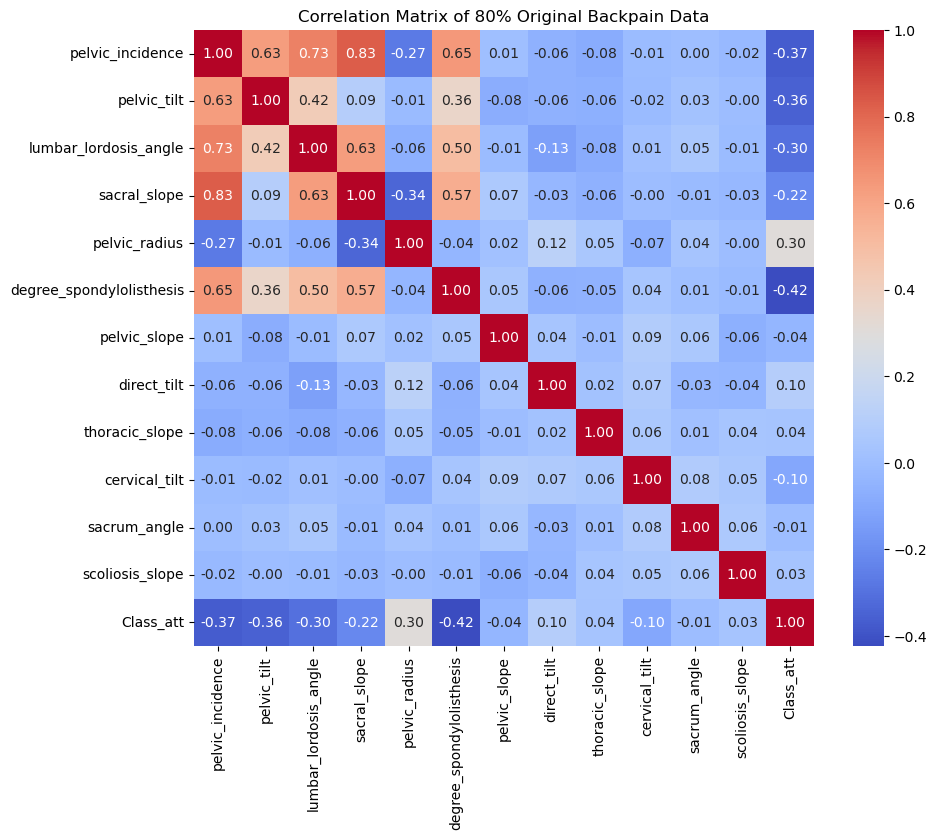

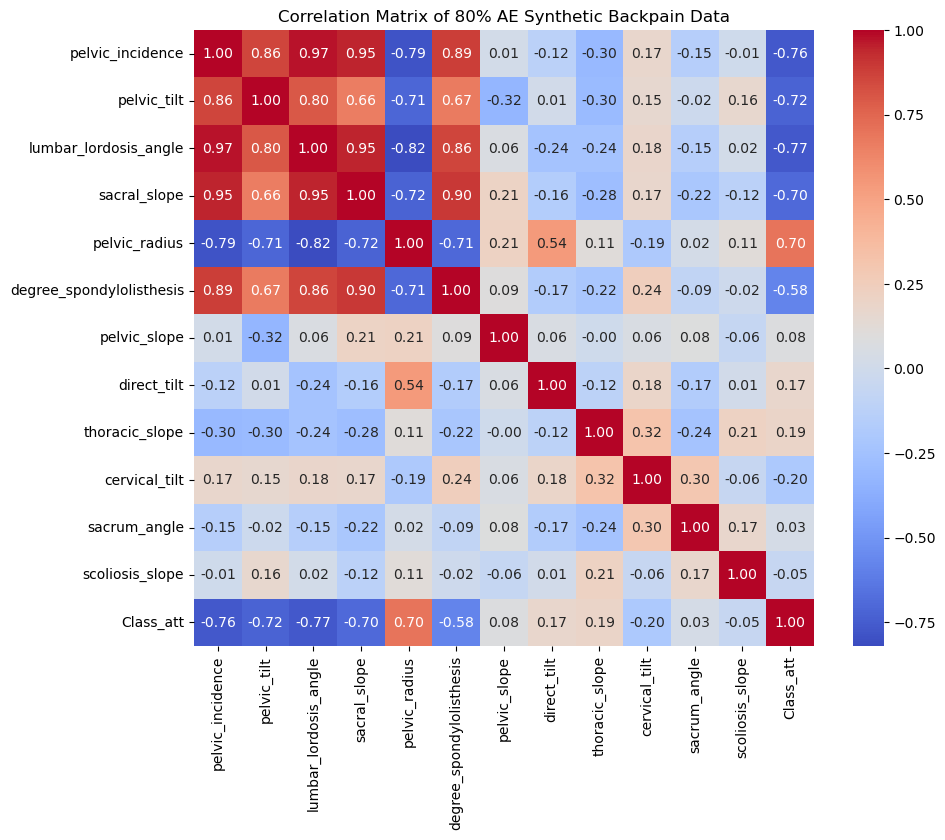

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_correlation_matrix(data, title):
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(title)
    plt.show()

# Plot correlation matrix for original data
plot_correlation_matrix(lowerBackPain_train_dataframe, "Correlation Matrix of 80% Original Backpain Data")

# Plot correlation matrix for synthetic data
plot_correlation_matrix(ae_synthetic_backpain_data_with_labels_df, "Correlation Matrix of 80% AE Synthetic Backpain Data")


# Computing Numerical Correlation Matrices of Original and Synthetic Datasets

In [77]:
# For the original dataset
print('80% Original Lower Backpain Numerical Correlation Matrix:')
print(lowerBackPain_train_dataframe.corr())

# For the AE synthetic dataset
print('80% AE-Synthetic Lower Backpain Numerical Correlation Matrix:')
print(ae_synthetic_backpain_data_with_labels_df.corr())

80% Original Lower Backpain Numerical Correlation Matrix:
                          pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  1.000000     0.632299   
pelvic_tilt                       0.632299     1.000000   
lumbar_lordosis_angle             0.726644     0.424321   
sacral_slope                      0.831059     0.094588   
pelvic_radius                    -0.270125    -0.014856   
degree_spondylolisthesis          0.646754     0.362546   
pelvic_slope                      0.006898    -0.078854   
direct_tilt                      -0.061357    -0.062175   
thoracic_slope                   -0.082166    -0.063314   
cervical_tilt                    -0.011488    -0.015471   
sacrum_angle                      0.003252     0.025495   
scoliosis_slope                  -0.022139    -0.001128   
Class_att                        -0.371282    -0.355798   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                   

# Scatter Plots

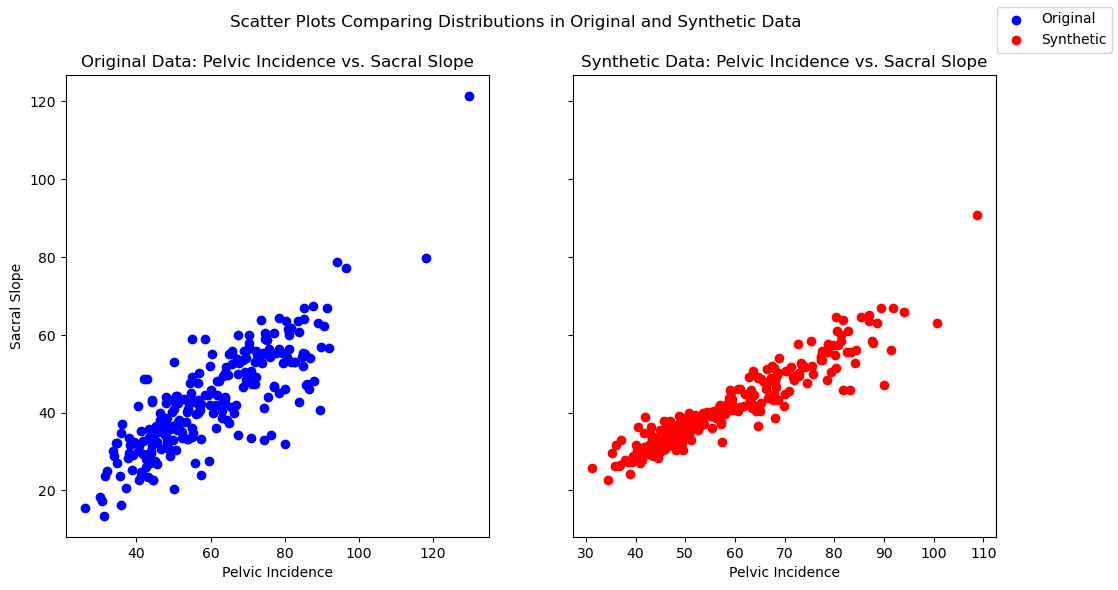

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Assuming 'original_data' and 'synthetic_data' are DataFrame containing these features
axes[0].scatter(lowerBackPain_train_dataframe['pelvic_incidence'], lowerBackPain_train_dataframe['sacral_slope'], color='blue', label='Original')
axes[0].set_title('Original Data: Pelvic Incidence vs. Sacral Slope')
axes[0].set_xlabel('Pelvic Incidence')
axes[0].set_ylabel('Sacral Slope')

axes[1].scatter(ae_synthetic_backpain_data_with_labels_df['pelvic_incidence'], ae_synthetic_backpain_data_with_labels_df['sacral_slope'], color='red', label='Synthetic')
axes[1].set_title('Synthetic Data: Pelvic Incidence vs. Sacral Slope')
axes[1].set_xlabel('Pelvic Incidence')

fig.suptitle('Scatter Plots Comparing Distributions in Original and Synthetic Data')
fig.legend(loc='upper right')
plt.show()


# BAR GRAPH AND SCATTER PLOTS FOR RESULTS FROM CORRELATION MATRIX

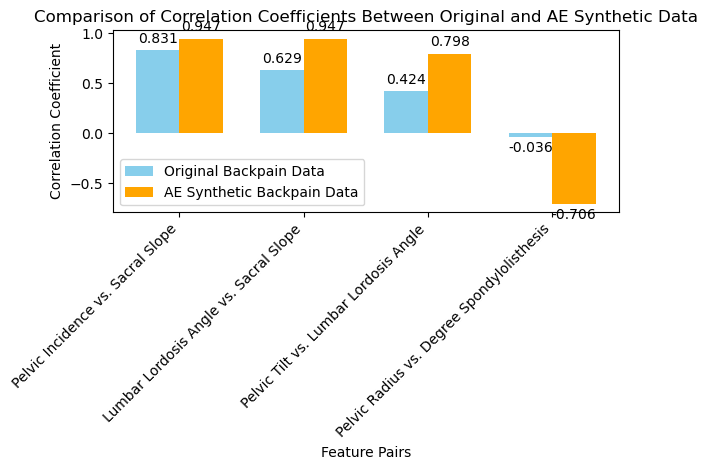

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Feature pairs and their correlation coefficients
features = ['Pelvic Incidence vs. Sacral Slope', 'Lumbar Lordosis Angle vs. Sacral Slope']
original_correlations = [0.831, 0.629]  # From the Original Lower Backpain Data
synthetic_correlations = [0.947, 0.947]  # From the AE Synthetic Lower Backpain Data

# Additional features
additional_features = ['Pelvic Tilt vs. Lumbar Lordosis Angle', 'Pelvic Radius vs. Degree Spondylolisthesis']
additional_orig_correlations = [0.424, -0.036]  # Additional correlation coefficients for original
additional_synth_correlations = [0.798, -0.706]  # Additional correlation coefficients for synthetic

# Combine lists
features += additional_features
original_correlations += additional_orig_correlations
synthetic_correlations += additional_synth_correlations

# Plotting the bar graph
x = np.arange(len(features))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, original_correlations, width, label='Original Backpain Data', color='skyblue')
rects2 = ax.bar(x + width/2, synthetic_correlations, width, label='AE Synthetic Backpain Data', color='orange')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Feature Pairs')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Comparison of Correlation Coefficients Between Original and AE Synthetic Data')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha="right")
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()


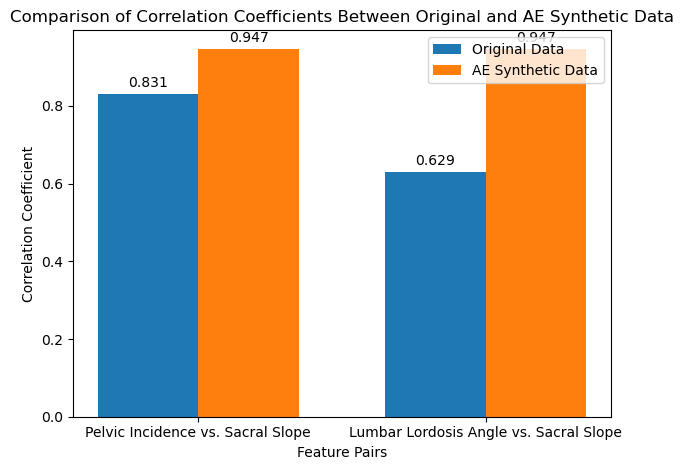

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Correlation coefficients from the text
original_correlations = [0.831, 0.629]  # Pelvic Incidence vs. Sacral Slope, Lumbar Lordosis Angle vs. Sacral Slope
synthetic_correlations = [0.947, 0.947]  # Same pairs in synthetic data

# Set up bar graph details
labels = ['Pelvic Incidence vs. Sacral Slope', 'Lumbar Lordosis Angle vs. Sacral Slope']
x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, original_correlations, width, label='Original Data')
rects2 = ax.bar(x + width/2, synthetic_correlations, width, label='AE Synthetic Data')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Feature Pairs')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Comparison of Correlation Coefficients Between Original and AE Synthetic Data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


# EXTRA WORKS

In [113]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have defined X_train_orig, X_test_orig, y_train_orig, y_test_orig,
# X_train_syn, X_test_syn, y_train_syn, y_test_syn as guided previously

classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(probability=True),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "XGBClassifier": XGBClassifier(),
    "ADA Boost": AdaBoostClassifier()
}

# TRTR: Train Real, Test Real
for name, clf in classifiers.items():
    clf.fit(X_train_orig, y_train_orig)
    y_pred = clf.predict(X_test_cont)
    print(f"80% AE-Orig Backpain Tranied {name}/Tested on 20% Control Data (TRTR):")
    print(classification_report(y_test_cont, y_pred))

# TSTR: Train Synthetic, Test Real
for name, clf in classifiers.items():
    clf.fit(X_train_syn_ae, y_train_syn_ae)
    y_pred = clf.predict(X_test_cont)
    print(f"80% AE-Synt Backpain Tranied {name}/Tested on 20% Control Data (TSTR):")
    print(classification_report(y_test_cont, y_pred))

80% AE-Orig Backpain Tranied Random Forest/Tested on 20% Control Data (TRTR):
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.33      0.20      0.25         5

    accuracy                           0.54        13
   macro avg       0.47      0.47      0.46        13
weighted avg       0.50      0.54      0.51        13

80% AE-Orig Backpain Tranied Gradient Boosting/Tested on 20% Control Data (TRTR):
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.67      0.40      0.50         5

    accuracy                           0.69        13
   macro avg       0.68      0.64      0.64        13
weighted avg       0.69      0.69      0.67        13

80% AE-Orig Backpain Tranied Logistic Regression/Tested on 20% Control Data (TRTR):
              precision    recall  f1-score   support

           0       0.75      0.75      0.75    

C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined an

80% AE-Orig Backpain Tranied MLPClassifier/Tested on 20% Control Data (TRTR):
              precision    recall  f1-score   support

           0       0.62      1.00      0.76         8
           1       0.00      0.00      0.00         5

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13

80% AE-Orig Backpain Tranied K-Nearest Neighbors/Tested on 20% Control Data (TRTR):
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13

[LightGBM] [Info] Number of positive: 62, number of negative: 136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `f

80% AE-Orig Backpain Tranied ADA Boost/Tested on 20% Control Data (TRTR):
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.75      0.60      0.67         5

    accuracy                           0.77        13
   macro avg       0.76      0.74      0.75        13
weighted avg       0.77      0.77      0.76        13

80% AE-Synt Backpain Tranied Random Forest/Tested on 20% Control Data (TSTR):
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13

80% AE-Synt Backpain Tranied Gradient Boosting/Tested on 20% Control Data (TSTR):
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
   

C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# INSTALL THE PRIVACY ASSESSMENT TOOL KITS KNOWN AS ANONYMETER AS MENTIONED ABOVE IN STEP 2

In [ ]:
!pip install anonymeter

# IMPORTING THE INSTALLED ANONYMETER'S PRIVACY RISK EVALUATORS FOR PRIVACY PRESERVATION ASSESSMENT ON THE GENERATED SYNTHETIC DATASET
For more detailed information on the usage of this tool do visit the author's website(blogger) via the links below.

https://www.anonos.com/blog/presenting-anonymeter-the-tool-for-assessing-privacy-risks-in-synthetic-datasets

https://github.com/statice/anonymeter

In [34]:
import pandas as pd
from anonymeter.evaluators import SinglingOutEvaluator, LinkabilityEvaluator, InferenceEvaluator

# STEP 3A: PRIVACY RISK ASSESSMENT VIA UNIVARIATE MODE ON 80% AE-SYNTHETIC LOWER BACK PAIN DATASET

In [66]:
singling_out = SinglingOutEvaluator(ori=lowerBackPain_train_dataframe, 
                                              syn=ae_synthetic_backpain_data_with_labels_df, 
                                              control=control_lbp_dataframe,
                                              n_attacks=1500)

try:
    singling_out.evaluate(mode='univariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_out.risk()
    print("Singling Out Risk:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk: PrivacyRisk(value=0.0009076834114580528, ci=(0.0, 0.004250233025974428))


In [67]:
res1 = singling_out.results()

print("The Singling Out Risk Type in Univariate Analysis When n_attacks=1500 for AE Synthetic Data Backpain:")
print("Successs rate of main attack:", res1.attack_rate)
print("Successs rate of baseline attack:", res1.baseline_rate)
print("Successs rate of control attack:", res1.control_rate)

The Singling Out Risk Type in Univariate Analysis When n_attacks=1500 for AE Synthetic Data Backpain:
Successs rate of main attack: SuccessRate(value=0.0032721064986503813, error=0.002591698026659507)
Successs rate of baseline attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of control attack: SuccessRate(value=0.0023665711845986233, error=0.002100219979720619)


In [68]:
singling_out1 = SinglingOutEvaluator(ori=lowerBackPain_train_dataframe, 
                                              syn=ae_synthetic_backpain_data_with_labels_df, 
                                              control=control_lbp_dataframe,
                                              n_attacks=500)

try:
    singling_out1.evaluate(mode='univariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_out1.risk()
    print("Singling Out Risk:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk: PrivacyRisk(value=0.002288435464555325, ci=(0.0, 0.01081919768515078))


In [69]:
res1a = singling_out1.results()

print("The Singling Out Risk Type in Univariate Analysis When n_attacks=1500 for AE Synthetic Data Backpain:")
print("Successs rate of main attack:", res1a.attack_rate)
print("Successs rate of baseline attack:", res1a.baseline_rate)
print("Successs rate of control attack:", res1a.control_rate)

The Singling Out Risk Type in Univariate Analysis When n_attacks=1500 for AE Synthetic Data Backpain:
Successs rate of main attack: SuccessRate(value=0.007781672868929911, error=0.006684042346247121)
Successs rate of baseline attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of control attack: SuccessRate(value=0.005505837157387619, error=0.0052367639470650325)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

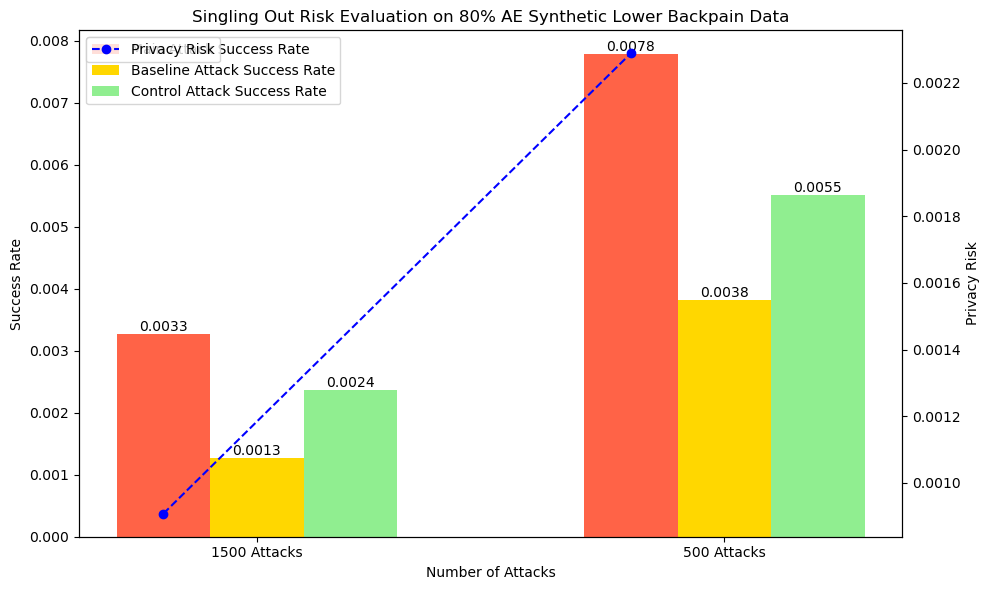

In [92]:
import matplotlib.pyplot as plt

# Data for graphing
attacks = ['1500 Attacks', '500 Attacks']
main_attack_success = [0.0032721064986503813, 0.007781672868929911]
baseline_attack_success = [0.001277215360090744, 0.0038121702307761206]
control_attack_success = [0.0023665711845986233, 0.005505837157387619]
privacy_risks = [0.0009076834114580528, 0.002288435464555325]  # Adding privacy risks

x = range(len(attacks))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, main_attack_success, width=0.2, label='Main Attack Success Rate', align='center', color='tomato')
ax.bar([p + 0.2 for p in x], baseline_attack_success, width=0.2, label='Baseline Attack Success Rate', align='center', color='gold')
ax.bar([p + 0.4 for p in x], control_attack_success, width=0.2, label='Control Attack Success Rate', align='center', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Attacks')
ax.set_ylabel('Success Rate')
ax.set_title('Singling Out Risk Evaluation on 80% AE Synthetic Lower Backpain Data')
ax.set_xticks([p + 0.2 for p in x])
ax.set_xticklabels(attacks)
ax.legend()

# Adding data labels
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            f'{i.get_height():.4f}', ha='center', va='bottom')

# Adding a slant straight line to represent privacy risks
ax2 = ax.twinx()  # Create a second y-axis for the privacy risk values
ax2.plot(attacks, privacy_risks, label='Privacy Risk', color='blue', marker='o', linestyle='--')
ax2.set_ylabel('Privacy Risk')
ax2.legend(loc='upper left')

fig.tight_layout()
plt.show()


Univariate Risk Assessment Success/Overall Success vs. Failure Rates via 1500 and 500 Attacks on 80% AE Synthetic Lower Backpain


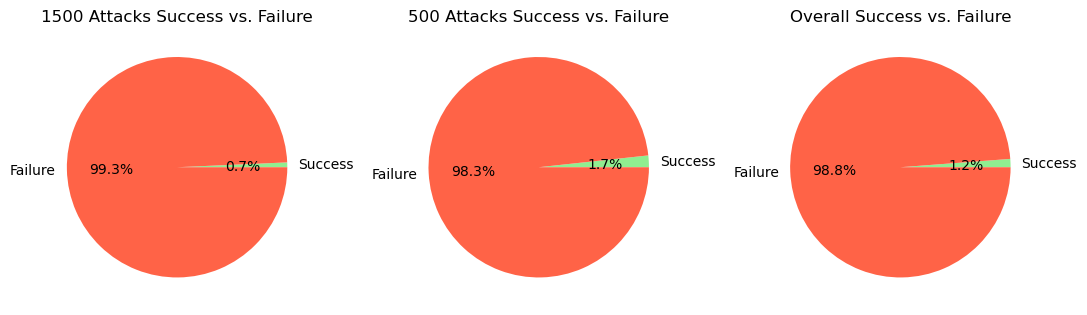

In [91]:
import matplotlib.pyplot as plt

print('Univariate Risk Assessment Success/Overall Success vs. Failure Rates via 1500 and 500 Attacks on 80% AE Synthetic Lower Backpain')

# Data for pie charts
# Success rates for 1500 and 500 attacks, respectively
success_1500 = [0.0033, 0.0013, 0.0024]  # Main, baseline, control
success_500 = [0.0078, 0.0038, 0.0055]  # Main, baseline, control

# Calculating failure rates
failure_1500 = 1 - sum(success_1500)
failure_500 = 1 - sum(success_500)

# Overall success and failure
overall_success = (sum(success_1500) + sum(success_500)) / 2
overall_failure = (failure_1500 + failure_500) / 2

# Labels for the plots
labels = ['Success', 'Failure']

# Colors for the plots
colors = ['lightgreen', 'tomato']

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(11, 6))

# Success vs. failure for 1500 attacks
axs[0].pie([sum(success_1500), failure_1500], labels=labels, colors=colors, autopct='%1.1f%%')
axs[0].set_title('1500 Attacks Success vs. Failure')

# Success vs. failure for 500 attacks
axs[1].pie([sum(success_500), failure_500], labels=labels, colors=colors, autopct='%1.1f%%')
axs[1].set_title('500 Attacks Success vs. Failure')

# Overall success vs. failure
axs[2].pie([overall_success, overall_failure], labels=labels, colors=colors, autopct='%1.1f%%')
axs[2].set_title('Overall Success vs. Failure')

# Enhance display
plt.tight_layout()
plt.show()


# STEP 3B: PRIVACY RISK ASSESSMENT VIA MULTIVARIATE MODE ON 80% AE-SYNTHETIC LOWER BACK PAIN DATASET

In [73]:
singling_out2 = SinglingOutEvaluator(ori=lowerBackPain_train_dataframe, 
                                              syn=ae_synthetic_backpain_data_with_labels_df, 
                                              control=control_lbp_dataframe,
                                              n_attacks=1500)

try:
    singling_out2.evaluate(mode='multivariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_out2.risk()
    print("Singling Out Risk:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk: PrivacyRisk(value=0.1377700681042139, ci=(0.11336254775851382, 0.162177588449914))


In [75]:
res2 = singling_out2.results()

print("The Singling Out Risk Type in Multivariate Analysis When n_attacks=1500 for AE Synthetic Data Backpain:")
print("Successs rate of main attack:", res2.attack_rate)
print("Successs rate of baseline attack:", res2.baseline_rate)
print("Successs rate of control attack:", res2.control_rate)

The Singling Out Risk Type in Multivariate Analysis When n_attacks=1500 for AE Synthetic Data Backpain:
Successs rate of main attack: SuccessRate(value=0.19544661951322875, error=0.02002674222145505)
Successs rate of baseline attack: SuccessRate(value=0.01125167105288893, error=0.005182233548812405)
Successs rate of control attack: SuccessRate(value=0.06689230943560652, error=0.01257833979835794)


In [76]:
singling_out3 = SinglingOutEvaluator(ori=lowerBackPain_train_dataframe, 
                                              syn=ae_synthetic_backpain_data_with_labels_df, 
                                              control=control_lbp_dataframe,
                                              n_attacks=500)

try:
    singling_out3.evaluate(mode='multivariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_out3.risk()
    print("Singling Out Risk:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk: PrivacyRisk(value=0.1478913823693418, ci=(0.10322918532664185, 0.19255357941204174))


In [102]:
res2a = singling_out3.results()

print("The Singling Out Risk Type in Multivariate Analysis When n_attacks=500 for AE Synthetic Data Backpain:")
print("Successs rate of main attack:", res2a.attack_rate)
print("Successs rate of baseline attack:", res2a.baseline_rate)
print("Successs rate of control attack:", res2a.control_rate)

The Singling Out Risk Type in Multivariate Analysis When n_attacks=500 for AE Synthetic Data Backpain:
Successs rate of main attack: SuccessRate(value=0.21618056137200395, error=0.03587756138440862)
Successs rate of baseline attack: SuccessRate(value=0.013735926826160597, error=0.009457172929570103)
Successs rate of control attack: SuccessRate(value=0.08014140168250443, error=0.023488951592517678)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

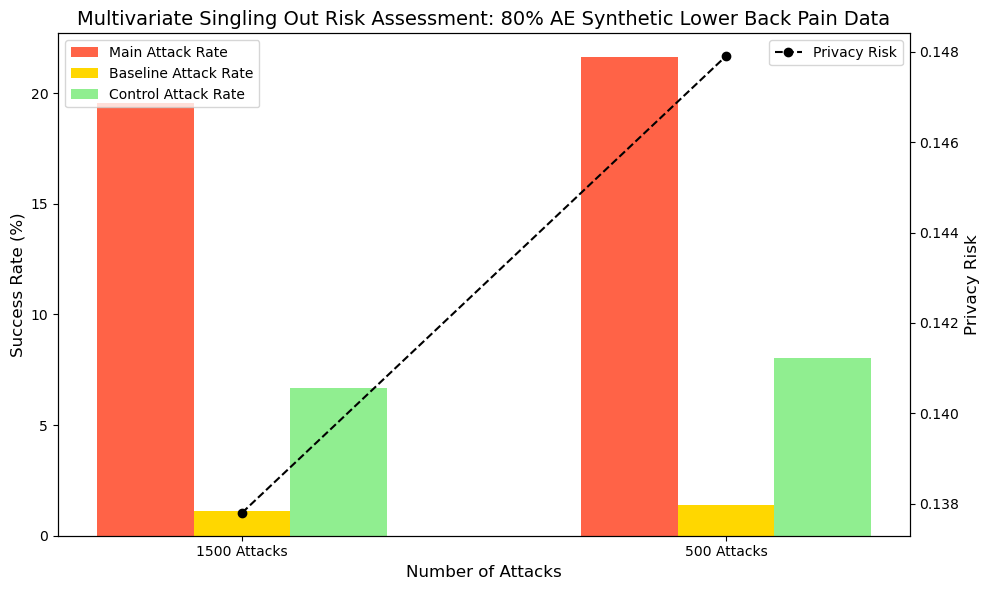

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
categories = ['1500 Attacks', '500 Attacks']
privacy_risk = [0.1378, 0.1479]
main_attack = [19.54, 21.62]
baseline_attack = [1.13, 1.37]
control_attack = [6.69, 8.01]

x = np.arange(len(categories))  # label locations
width = 0.2  # bar width

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting success rates
ax1.bar(x - width, main_attack, width, label='Main Attack Rate', color='tomato')
ax1.bar(x, baseline_attack, width, label='Baseline Attack Rate', color='gold')
ax1.bar(x + width, control_attack, width, label='Control Attack Rate', color='lightgreen')

# Adding Privacy Risk as a line plot
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(categories, privacy_risk, label='Privacy Risk', color='black', marker='o', linestyle='--')

# Adding text for labels, title, and custom x-axis tick labels, etc.
ax1.set_xlabel('Number of Attacks', fontsize=12)
ax1.set_ylabel('Success Rate (%)', fontsize=12)
ax2.set_ylabel('Privacy Risk', fontsize=12, color='black')
ax1.set_title('Multivariate Singling Out Risk Assessment: 80% AE Synthetic Lower Back Pain Data', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

fig.tight_layout()
plt.show()


Multivariate Risk Assessment Success/Overall Success vs. Failure Rates via 1500 and 500 Attacks on 80% AE Synthetic Lower Backpain


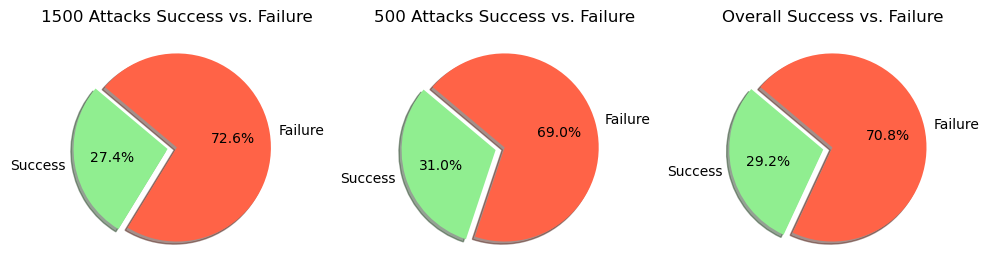

In [140]:
import matplotlib.pyplot as plt

# Success rates for each type of attack at different number of attacks
success_rates_1500 = [0.1954, 0.0113, 0.0669]
success_rates_500 = [0.2162, 0.0137, 0.0801]

# Calculate the combined success and failure rates for 1500 and 500 attacks
combined_success_rate_1500 = sum(success_rates_1500)
combined_failure_rate_1500 = 1 - combined_success_rate_1500
combined_success_rate_500 = sum(success_rates_500)
combined_failure_rate_500 = 1 - combined_success_rate_500

# Overall success and failure rates across all attacks
total_success_rates = success_rates_1500 + success_rates_500
overall_success_rate = sum(total_success_rates) / 2
overall_failure_rate = 1 - overall_success_rate

# Data preparation for pie charts
data_1500 = [combined_success_rate_1500, combined_failure_rate_1500]
data_500 = [combined_success_rate_500, combined_failure_rate_500]
data_overall = [overall_success_rate, overall_failure_rate]

# Labels for the pie charts
labels = ['Success', 'Failure']
colors = ['lightgreen', 'tomato']  # Success in green, Failure in orange
explode = (0.1, 0)  # only "explode" the 1st slice (i.e., 'Success')

# Creating subplots
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

print('Multivariate Risk Assessment Success/Overall Success vs. Failure Rates via 1500 and 500 Attacks on 80% AE Synthetic Lower Backpain')

# Pie chart for 1500 attacks
ax[0].pie(data_1500, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax[0].set_title('1500 Attacks Success vs. Failure')

# Pie chart for 500 attacks
ax[1].pie(data_500, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax[1].set_title('500 Attacks Success vs. Failure')

# Pie chart for overall success vs. failure
ax[2].pie(data_overall, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax[2].set_title('Overall Success vs. Failure')

# Adjust layout
plt.tight_layout()
plt.show()


# STEP 4: PRIVACY RISK ASSESSMENT VIA LINKABILITY ON 80% AE-SYNTHETIC LOWER BACK PAIN DATASET

In [82]:
# Dynamically setting n_attacks based on the smallest dataset size
min_dataset_size = min(len(lowerBackPain_train_dataframe), len(ae_synthetic_backpain_data_with_labels_df), len(control_lbp_dataframe))
n_attacks = min_dataset_size  # Or some fraction of the smallest size, if desired

aux_cols = [
    ['pelvic_incidence', 'pelvic_tilt'],  # Attributes in dataset A
    ['sacral_slope', 'pelvic_radius']     # Attributes in dataset B
]

linkability_evaluato = LinkabilityEvaluator(ori=lowerBackPain_train_dataframe, 
                                             syn=ae_synthetic_backpain_data_with_labels_df, 
                                             control=control_lbp_dataframe,
                                             n_attacks=n_attacks,
                                             aux_cols=aux_cols,
                                             n_neighbors=10)

linkability_evaluato.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
linkability_risks = linkability_evaluato.risk()
print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for AE Synthetic Backpain Data:", linkability_risks)

Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for AE Synthetic Backpain Data: PrivacyRisk(value=0.0, ci=(0.0, 0.4233026159812414))


In [92]:
linkabilitys = linkability_evaluato.results()

print("Linkability When n_neighbors=10 for AE Synthetic Backpain Data:")
print("Successs rate of main attack:", linkabilitys.attack_rate)
print("Successs rate of baseline attack:", linkabilitys.baseline_rate)
print("Successs rate of control attack:", linkabilitys.control_rate)

Linkability When n_neighbors=10 for AE Synthetic Backpain Data:
Successs rate of main attack: SuccessRate(value=0.6063159918595225, error=0.11783755646933888)
Successs rate of baseline attack: SuccessRate(value=0.39368400814047755, error=0.11783755646933888)
Successs rate of control attack: SuccessRate(value=0.6063159918595225, error=0.11783755646933888)


In [91]:
# Dynamically setting n_attacks based on the smallest dataset size
min_dataset_size = min(len(lowerBackPain_train_dataframe), len(ae_synthetic_backpain_data_with_labels_df), len(control_lbp_dataframe))
n_attacks = min_dataset_size  # Or some fraction of the smallest size, if desired

aux_cols = [
    ['pelvic_incidence', 'pelvic_tilt'],  # Attributes in dataset A
    ['sacral_slope', 'pelvic_radius']     # Attributes in dataset B
]

linkability_evaluato1 = LinkabilityEvaluator(ori=lowerBackPain_train_dataframe, 
                                             syn=ae_synthetic_backpain_data_with_labels_df, 
                                             control=control_lbp_dataframe,
                                             n_attacks=n_attacks,
                                             aux_cols=aux_cols,
                                             n_neighbors=5)

linkability_evaluato1.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
linkability_risks = linkability_evaluato1.risk()
print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for AE Synthetic Backpain Data:", linkability_risks)

Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for AE Synthetic Backpain Data: PrivacyRisk(value=0.0, ci=(0.0, 0.07246363347936291))


In [93]:
linkabilitys1 = linkability_evaluato1.results()

print("Linkability When n_neighbors=5 for AE Synthetic Backpain Data:")
print("Successs rate of main attack:", linkabilitys1.attack_rate)
print("Successs rate of baseline attack:", linkabilitys1.baseline_rate)
print("Successs rate of control attack:", linkabilitys1.control_rate)

Linkability When n_neighbors=5 for AE Synthetic Backpain Data:
Successs rate of main attack: SuccessRate(value=0.2266160209326565, error=0.09977612803753663)
Successs rate of baseline attack: SuccessRate(value=0.10511203023605942, error=0.0701736832500667)
Successs rate of control attack: SuccessRate(value=0.34812001162925366, error=0.11470299287716453)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

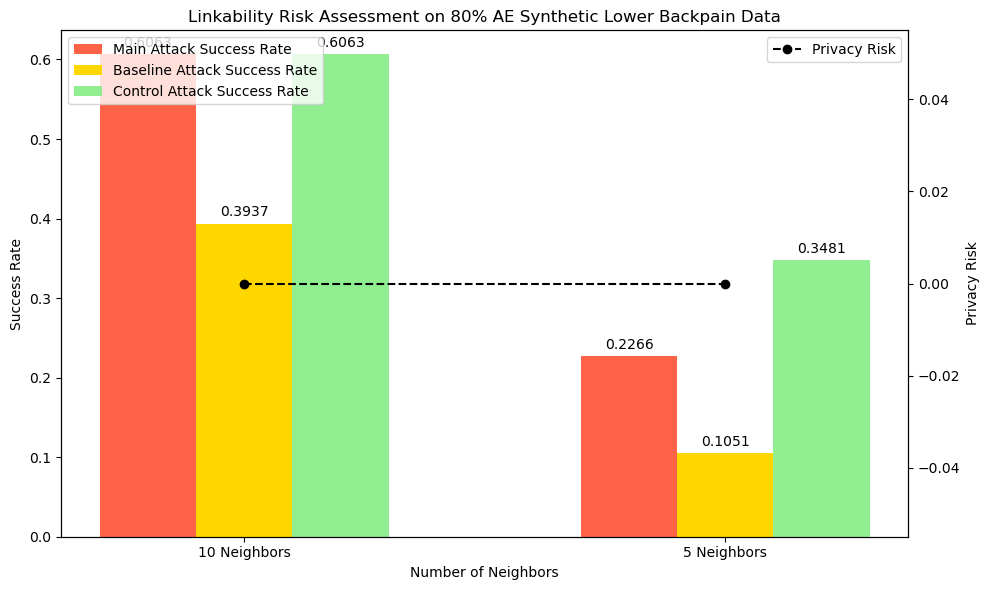

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
categories = ['10 Neighbors', '5 Neighbors']
main_attack = [0.6063, 0.2266]
baseline_attack = [0.3937, 0.1051]
control_attack = [0.6063, 0.3481]
privacy_risks = [0.0, 0.0]  # No explicit risk value given other than 0

x = np.arange(len(categories))  # label locations
width = 0.2  # width of the bars

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting success rates
rects1 = ax1.bar(x - width, main_attack, width, label='Main Attack Success Rate', color='tomato')
rects2 = ax1.bar(x, baseline_attack, width, label='Baseline Attack Success Rate', color='gold')
rects3 = ax1.bar(x + width, control_attack, width, label='Control Attack Success Rate', color='lightgreen')

# Adding Privacy Risk as line plot for visibility, assuming very low near zero values
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(categories, privacy_risks, label='Privacy Risk', color='black', marker='o', linestyle='--')

# Adding text for labels, title, and custom x-axis tick labels, etc.
ax1.set_xlabel('Number of Neighbors')
ax1.set_ylabel('Success Rate')
ax2.set_ylabel('Privacy Risk', color='black')
ax1.set_title('Linkability Risk Assessment on 80% AE Synthetic Lower Backpain Data')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adding labels on bars
for rect in rects1 + rects2 + rects3:
    height = rect.get_height()
    ax1.annotate(f'{height:.4f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

fig.tight_layout()  # to adjust subplot parameters to give specified padding
plt.show()


Linkability Risk Assessment Success/Overall Success vs. Failure Rates via 10 and 5 Neighbors on 80% AE Synthetic Lower Back Pain Dataset


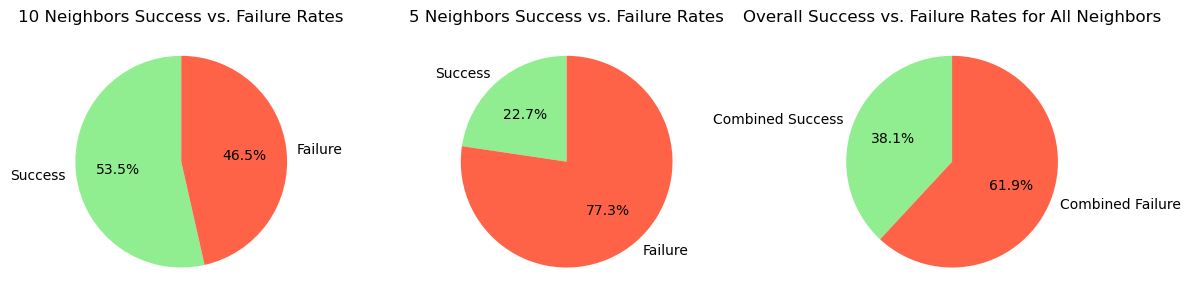

In [5]:
print('Linkability Risk Assessment Success/Overall Success vs. Failure Rates via 10 and 5 Neighbors on 80% AE Synthetic Lower Back Pain Dataset')


# Success rates from previous explanation with 10 and 5 neighbors
success_rates_10_neighbors = [0.6063, 0.3937, 0.6063]  # Main, Baseline, Control for 10 neighbors
success_rates_5_neighbors = [0.2266, 0.1051, 0.3481]  # Main, Baseline, Control for 5 neighbors

# Calculating failure rates by subtracting success rates from 1
failure_rates_10_neighbors = [1 - rate for rate in success_rates_10_neighbors]
failure_rates_5_neighbors = [1 - rate for rate in success_rates_5_neighbors]

# Combined success and failure rates for overall
combined_success_rates = [(x + y) / 2 for x, y in zip(success_rates_10_neighbors, success_rates_5_neighbors)]
combined_failure_rates = [1 - x for x in combined_success_rates]

# Setting up the plot for three pie charts
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# 10 Neighbors Success vs. Failure Rates
axs[0].pie([sum(success_rates_10_neighbors), sum(failure_rates_10_neighbors)], labels=['Success', 'Failure'], autopct='%1.1f%%', colors=['lightgreen', 'tomato'], startangle=90)
axs[0].set_title('10 Neighbors Success vs. Failure Rates')

# 5 Neighbors Success vs. Failure Rates
axs[1].pie([sum(success_rates_5_neighbors), sum(failure_rates_5_neighbors)], labels=['Success', 'Failure'], autopct='%1.1f%%', colors=['lightgreen', 'tomato'], startangle=90)
axs[1].set_title('5 Neighbors Success vs. Failure Rates')

# Overall Combined Success vs. Failure Rates
axs[2].pie([sum(combined_success_rates), sum(combined_failure_rates)], labels=['Combined Success', 'Combined Failure'], autopct='%1.1f%%', colors=['lightgreen', 'tomato'], startangle=90)
axs[2].set_title('Overall Success vs. Failure Rates for All Neighbors')

plt.tight_layout()
plt.show()


# STEP 5: PRIVACY RISK ASSESSMENT VIA INFERENCE PER-COLUMN ON 80% AE-SYNTHETIC LOWER BACK PAIN DATASET

C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.1354880279102087, baseline = 0.27218001744388043. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.05954803372483551, baseline = 0.07473603256191015. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.1354880279102087, baseline = 0.1354880279102087. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.9556399651122391,

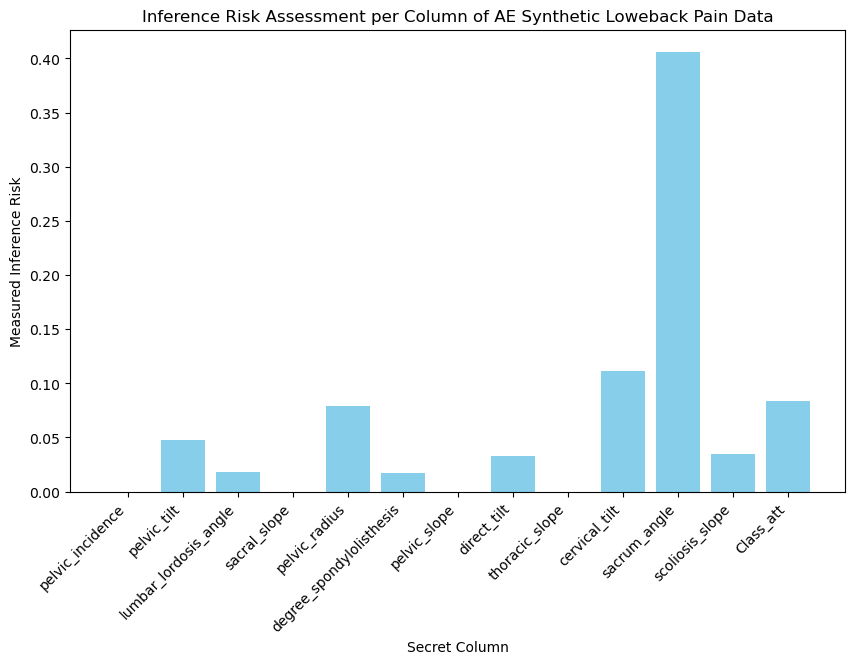

In [69]:
# Dynamically setting n_attacks based on the smallest dataset size
min_dataset_size = min(len(lowerBackPain_train_dataframe), len(ae_synthetic_backpain_data_with_labels_dfNEW), len(control_lbp_dataframe))
n_attacks_attempted = min_dataset_size  # Or some fraction of the smallest size, if desired

# ae_synthetic_backpain_data_with_labels_df

columns = lowerBackPain_train_dataframe.columns
inference_resultssNEW = []

for secret in columns:
    aux_cols = [col for col in columns if col != secret]
    
    evaluator_inferensesNEW = InferenceEvaluator(ori=lowerBackPain_train_dataframe, 
                                   syn=ae_synthetic_backpain_data_with_labels_dfNEW, 
                                   control=control_lbp_dataframe,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=n_attacks_attempted) # Use the dynamically set value
    evaluator_inferensesNEW.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
    inference_resultssNEW.append((secret,  evaluator_inferensesNEW.risk()))

# Plotting the inference risks
import matplotlib.pyplot as plt

risks = [res[1].value for res in inference_resultssNEW]
columns = [res[0] for res in inference_resultssNEW]

plt.figure(figsize=(10, 6))
plt.bar(columns, risks, color='skyblue')
plt.xlabel('Secret Column')
plt.ylabel('Measured Inference Risk')
plt.xticks(rotation=45, ha='right')
plt.title('Inference Risk Assessment per Column of AE Synthetic Loweback Pain Data')
plt.show()

In [73]:
print('Inference Risk Assessment on AE Synthetic Loweback Pain Data when n_attempted_attacks = smallest dataset size used:', inference_resultssNEW)

Inference Risk Assessment on AE Synthetic Loweback Pain Data when n_attempted_attacks = smallest dataset size used: [('pelvic_incidence', PrivacyRisk(value=0.0, ci=(0.0, 0.16219787502854754))), ('pelvic_tilt', PrivacyRisk(value=0.04767904040709773, ci=(0.0, 0.12688490116732518))), ('lumbar_lordosis_angle', PrivacyRisk(value=0.017568292085487925, ci=(0.0, 0.15025209681857782))), ('sacral_slope', PrivacyRisk(value=0.0, ci=(0.0, 0.09945809990263602))), ('pelvic_radius', PrivacyRisk(value=0.0791124022836285, ci=(0.0, 0.3622679085570234))), ('degree_spondylolisthesis', PrivacyRisk(value=0.017264975945233147, ci=(0.0, 0.14081746270816609))), ('pelvic_slope', PrivacyRisk(value=0.0, ci=(0.0, 0.0761754361861941))), ('direct_tilt', PrivacyRisk(value=0.032829547829745946, ci=(0.0, 0.1300196578111711))), ('thoracic_slope', PrivacyRisk(value=0.0, ci=(0.0, 0.11958920303681193))), ('cervical_tilt', PrivacyRisk(value=0.11127445911087092, ci=(0.0, 0.2747005261846748))), ('sacrum_angle', PrivacyRisk(val

In [71]:
inferNEW = evaluator_inferensesNEW.results()

print("Inference Risk for AE Synthetic Loweback Pain Data when n_attempted_attacks = smallest dataset size used:")
print("Successs rate of main attack:", inferNEW.attack_rate)
print("Successs rate of baseline attack:", inferNEW.baseline_rate)
print("Successs rate of control attack:", inferNEW.control_rate)

Inference Risk for AE Synthetic Loweback Pain Data when n_attempted_attacks = smallest dataset size used:
Successs rate of main attack: SuccessRate(value=0.667067987207821, error=0.11338710627934007)
Successs rate of baseline attack: SuccessRate(value=0.4544360034887761, error=0.12023887181278083)
Successs rate of control attack: SuccessRate(value=0.6366919895336717, error=0.11588068195582932)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

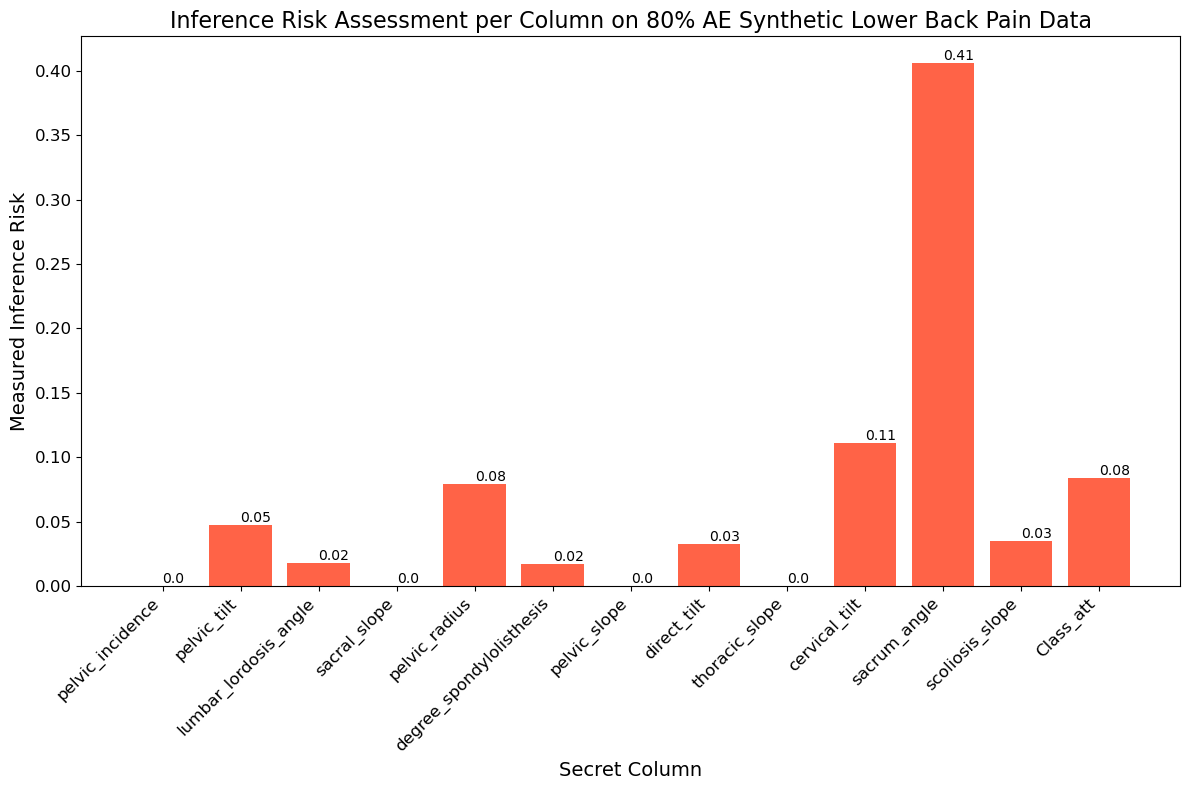

In [84]:
import matplotlib.pyplot as plt

# Extracting risk values and columns for plotting
risks = [res[1].value for res in inference_resultssNEW]
columns = [res[0] for res in inference_resultssNEW]

plt.figure(figsize=(12, 8))
bars = plt.bar(columns, risks, color='tomato')

plt.xlabel('Secret Column', fontsize=14)
plt.ylabel('Measured Inference Risk', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Inference Risk Assessment per Column on 80% AE Synthetic Lower Back Pain Data', fontsize=16)

# Adding the risk value above each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval,2), va='bottom') # va: vertical alignment

plt.tight_layout()
plt.show()


Success and Failure Rates for Different Attack Types by Inference Risk Per Column on 80% AE Synthetic Lower Back Pain Dataset


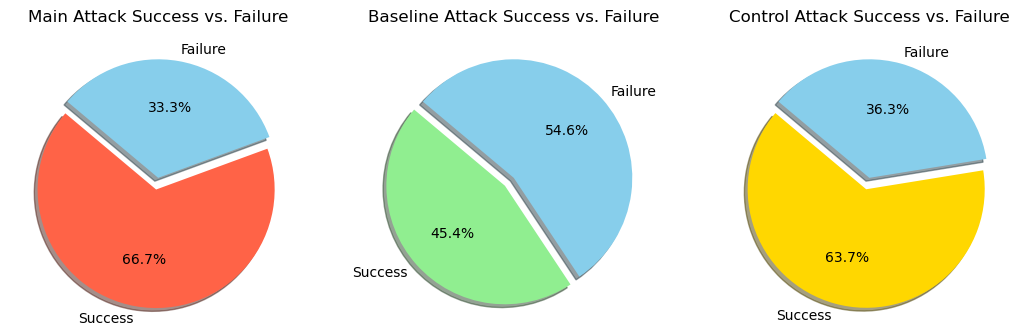

In [6]:
import matplotlib.pyplot as plt


print('Success and Failure Rates for Different Attack Types by Inference Risk Per Column on 80% AE Synthetic Lower Back Pain Dataset')
# Success rates and failure for each attack based on provided data
attacks_data = {
    'Main Attack': 0.667067987207821,
    'Baseline Attack': 0.4544360034887761,
    'Control Attack': 0.6366919895336717,
}


# Adding failure rates by calculating the complement to 1 for each
failure_rates = {key: 1 - value for key, value in attacks_data.items()}

# Colors for the pie chart
colors = ['tomato', 'lightgreen', 'gold']


# Exploding the 1st slice (i.e. 'Overall Success')
explode = (0.1, 0) 

# Create pie charts for each type of attack
fig, axs = plt.subplots(1, 3, figsize=(13, 8))

for i, (key, value) in enumerate(attacks_data.items()):
    axs[i].pie([value, failure_rates[key]], labels=['Success', 'Failure'], explode=explode, colors=[colors[i], 'skyblue'], autopct='%1.1f%%', shadow=True, startangle=140)
    axs[i].set_title(f'{key} Success vs. Failure')

plt.show()


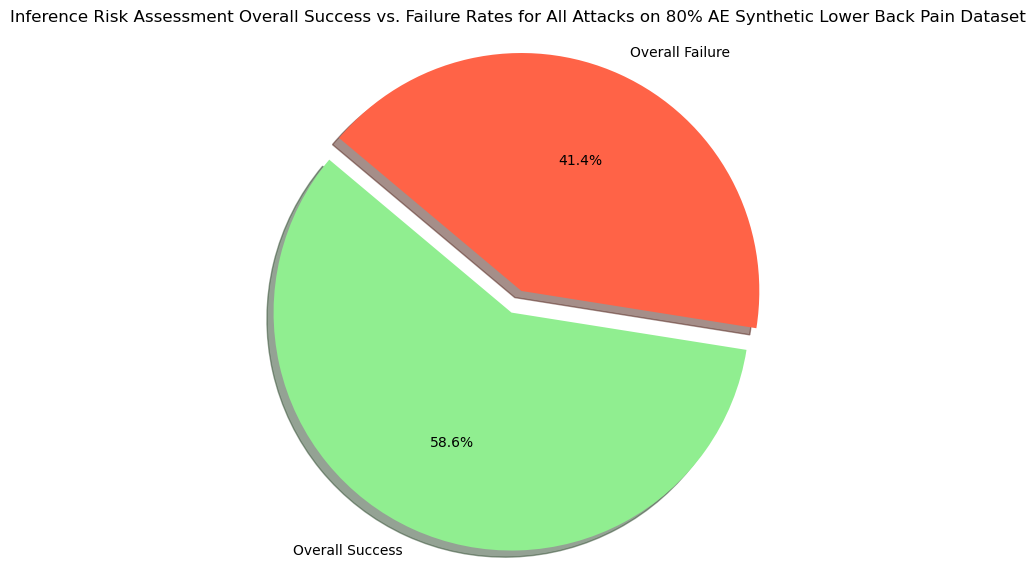

In [7]:
# Success rates for main, baseline, and control attacks
success_rate_main = 0.667067987207821
success_rate_baseline = 0.4544360034887761
success_rate_control = 0.6366919895336717

# Calculating overall success vs. failure rates for all attack types combined
total_success = success_rate_main + success_rate_baseline + success_rate_control
total_attacks = 3  # Since each attack rate is calculated out of 1
overall_success_rate = total_success / total_attacks
overall_failure_rate = 1 - overall_success_rate

# Labels for the pie chart
labels = ['Overall Success', 'Overall Failure']

# Values for each section of the pie chart
sizes = [overall_success_rate, overall_failure_rate]

# Colors for each section
colors = ['lightgreen', 'tomato']

# Exploding the 1st slice (i.e. 'Overall Success')
explode = (0.1, 0)  

# Creating the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Inference Risk Assessment Overall Success vs. Failure Rates for All Attacks on 80% AE Synthetic Lower Back Pain Dataset')
plt.show()
